In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import zscore
import warnings
warnings.filterwarnings( "ignore")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dheepig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dheepig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Problem 1 - Election Data Analysis

In [2]:
ds=pd.read_excel('C:/Users/dheepig/Desktop/Dheepika/Great Lakes/Session 6- Machine Learning/Project/Datasets/Election_Data.xlsx',sheet_name='Sheet1')
ds.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


# Question 1.1. Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [4]:
row, col = ds.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 1525 rows and 10 columns in the dataset


In [5]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [6]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ds.isnull().any()

Unnamed: 0                 False
vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

In [8]:
ds.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
dup=ds.duplicated().sum()
print("There are total of {}".format(dup), "duplicate records in the dataset")

There are total of 0 duplicate records in the dataset


In [10]:
dups=ds.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
ds.drop_duplicates(subset=None,keep='first',inplace=True)

In [12]:
ds.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [13]:
ds.drop(["Unnamed: 0"],axis=1,inplace=True)

In [14]:
ds.skew(axis=0,skipna=True)

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [15]:
ds.kurtosis(axis=0,skipna=True)

age                       -0.946897
economic.cond.national    -0.255994
economic.cond.household   -0.206302
Blair                     -1.065582
Hague                     -1.391743
Europe                    -1.237841
political.knowledge       -1.216646
dtype: float64

In [16]:
for column in ds.columns:
    if ds[column].dtype !='object':
        median=ds[column].median()
        ds[column]=ds[column].fillna(median)
ds.isnull().sum()  

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [17]:
def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

def detect_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [18]:
lr1,ur1=detect_outlier(ds['age'])
lr2,ur2=detect_outlier(ds['economic.cond.national'])
lr3,ur3=detect_outlier(ds['economic.cond.household'])
lr4,ur4=detect_outlier(ds['Blair'])
lr5,ur5=detect_outlier(ds['Hague'])
lr6,ur6=detect_outlier(ds['Europe'])
lr7,ur7=detect_outlier(ds['political.knowledge'])
print("lower range",lr1,"upper range",ur1)
print("lower range",lr2,"upper range",ur2)
print("lower range",lr3,"upper range",ur3)
print("lower range",lr4,"upper range",ur4)
print("lower range",lr5,"upper range",ur5)
print("lower range",lr6,"upper range",ur6)
print("lower range",lr7,"upper range",ur7)

lower range 2.0 upper range 106.0
lower range 1.5 upper range 5.5
lower range 1.5 upper range 5.5
lower range -1.0 upper range 7.0
lower range -1.0 upper range 7.0
lower range -5.0 upper range 19.0
lower range -3.0 upper range 5.0


In [19]:
num = ds.select_dtypes(include=['int','float']).columns

In [20]:
def proportion(x):
        xs = pd.Series(sorted(ds[x]))
        Q3 = xs.quantile(q=0.75)
        Q1 = xs.quantile(q=0.25)
        IQR = Q3-Q1
        LR = Q1-(1.5*IQR)
        UR = Q3+(1.5*IQR)
        
        data = ds[x]
        count = 0
        for value in data:
            if (value<LR) or (value>UR):
                count += 1
            else:
                pass

        _proportion = round((count/len(ds[x]))*100,2)
        print('Outlier proportion: {}: {}%'.format(x, _proportion))

In [21]:
for i in num:
    proportion(i)

Outlier proportion: age: 0.0%
Outlier proportion: economic.cond.national: 2.43%
Outlier proportion: economic.cond.household: 4.26%
Outlier proportion: Blair: 0.0%
Outlier proportion: Hague: 0.0%
Outlier proportion: Europe: 0.0%
Outlier proportion: political.knowledge: 0.0%


In [22]:
corr1=ds.corr()
round(corr1,2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.00,0.02,-0.04,0.03,0.03,0.07,-0.05
economic.cond.national,0.02,1.00,0.35,0.33,-0.20,-0.21,-0.02
economic.cond.household,-0.04,0.35,1.00,0.22,-0.10,-0.11,-0.04
Blair,0.03,0.33,0.22,1.00,-0.24,-0.30,-0.02
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03
Europe,0.07,-0.21,-0.11,-0.30,0.29,1.00,-0.15
political.knowledge,-0.05,-0.02,-0.04,-0.02,-0.03,-0.15,1.00


<AxesSubplot:>

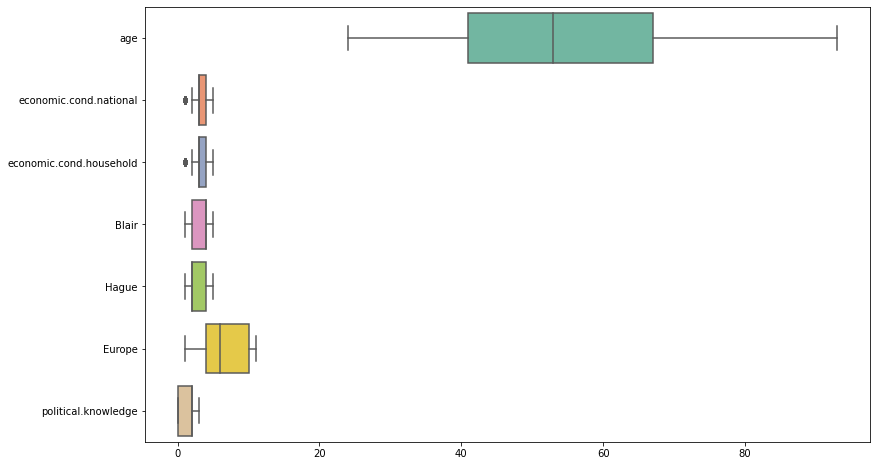

In [23]:
plt.figure(figsize=(13,8))
sns.boxplot(data=ds,orient="h", palette="Set2")

In [24]:
for column in ds.columns:
    if ds[column].dtype=='object':
        print(column.upper(),': ',ds[column].nunique())
        print(ds[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [25]:
ds[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].nunique()

age                        70
economic.cond.national      5
economic.cond.household     5
Blair                       5
Hague                       5
Europe                     11
political.knowledge         4
dtype: int64

In [26]:
ds[['age','economic.cond.national','economic.cond.household']].describe()

,age,economic.cond.national,economic.cond.household
count,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328
std,15.711209,0.880969,0.929951
min,24.000000,1.000000,1.000000
25%,41.000000,3.000000,3.000000
50%,53.000000,3.000000,3.000000
75%,67.000000,4.000000,4.000000
max,93.000000,5.000000,5.000000


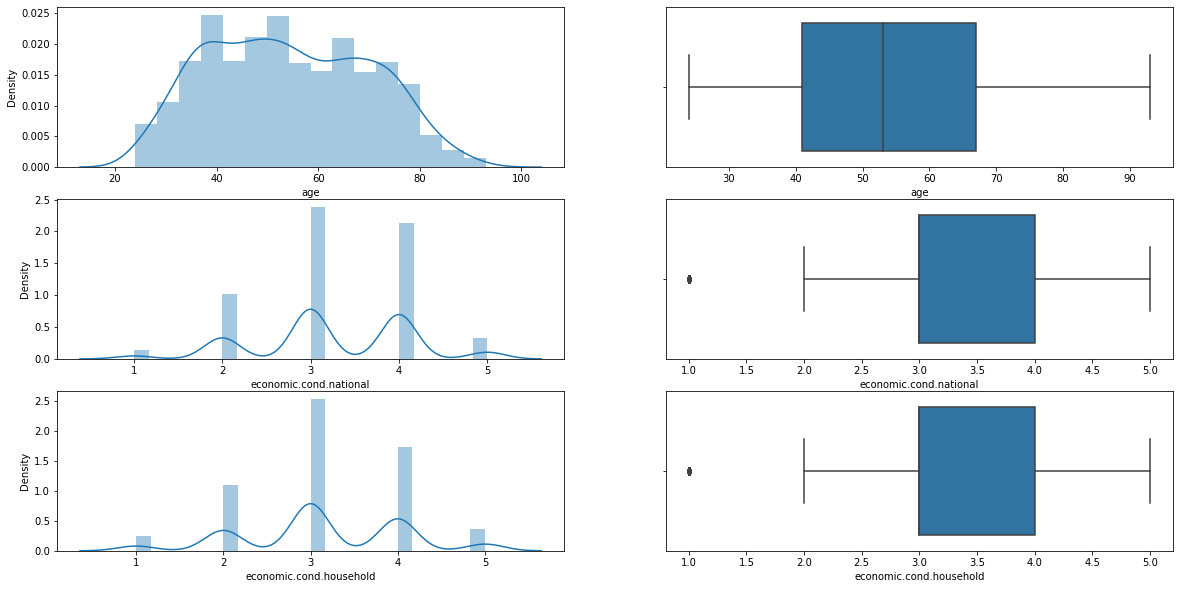

In [27]:
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['age'],kde=True,ax=axes[0][0])
sns.boxplot(x='age',data=ds,ax=axes[0][1])
sns.distplot(ds['economic.cond.national'],kde=True,ax=axes[1][0])
sns.boxplot(x='economic.cond.national',data=ds,ax=axes[1][1])
sns.distplot(ds['economic.cond.household'],kde=True,ax=axes[2][0])
sns.boxplot(x='economic.cond.household',data=ds,ax=axes[2][1])
plt.show()

In [28]:
ds[['Blair','Hague']].describe()

,Blair,Hague
count,1525.000000,1525.000000
mean,3.334426,2.746885
std,1.174824,1.230703
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,2.000000
75%,4.000000,4.000000
max,5.000000,5.000000


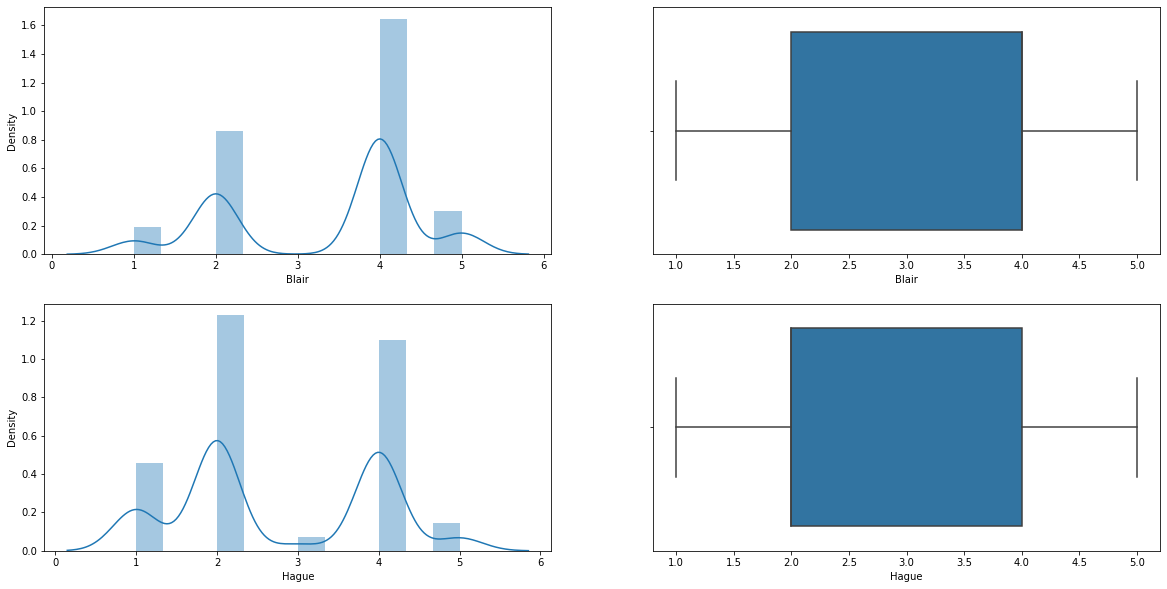

In [29]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['Blair'],kde=True,ax=axes[0][0])
sns.boxplot(x='Blair',data=ds,ax=axes[0][1])
sns.distplot(ds['Hague'],kde=True,ax=axes[1][0])
sns.boxplot(x='Hague',data=ds,ax=axes[1][1])
plt.show()

In [30]:
ds[['Europe','political.knowledge']].describe()

,Europe,political.knowledge
count,1525.000000,1525.000000
mean,6.728525,1.542295
std,3.297538,1.083315
min,1.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,2.000000
75%,10.000000,2.000000
max,11.000000,3.000000


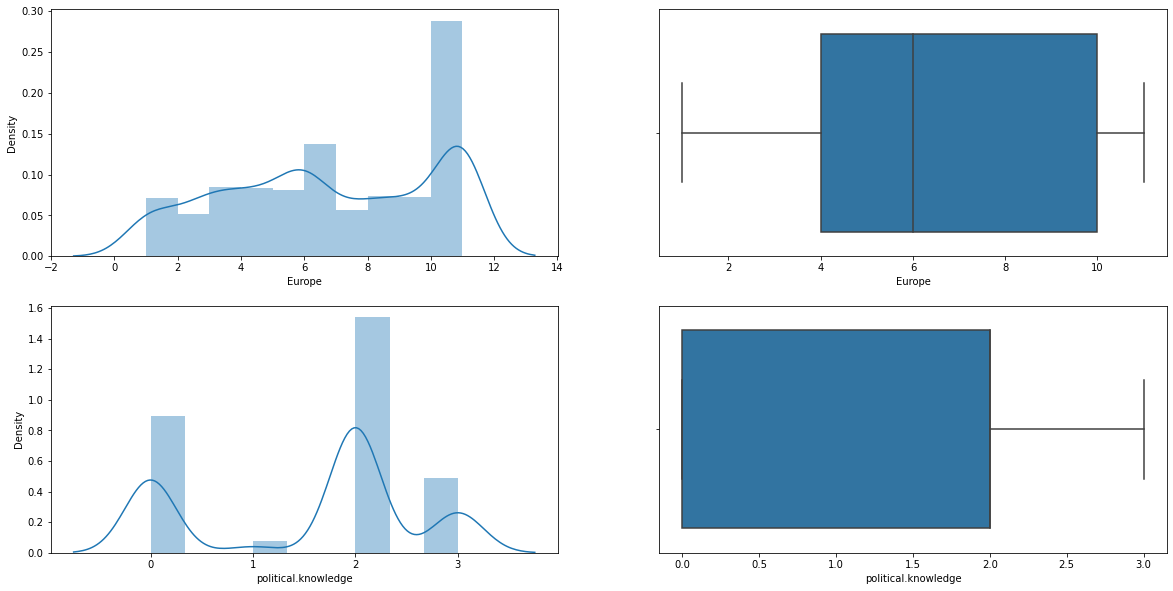

In [31]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sns.distplot(ds['Europe'],kde=True,ax=axes[0][0])
sns.boxplot(x='Europe',data=ds,ax=axes[0][1])
sns.distplot(ds['political.knowledge'],kde=True,ax=axes[1][0])
sns.boxplot(x='political.knowledge',data=ds,ax=axes[1][1])
plt.show()

In [32]:
ds['vote']=ds['vote'].astype("category")

In [33]:
ds['gender']=ds['gender'].astype("category")

In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   int64   
 3   economic.cond.household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political.knowledge      1525 non-null   int64   
 8   gender                   1525 non-null   category
dtypes: category(2), int64(7)
memory usage: 98.5 KB


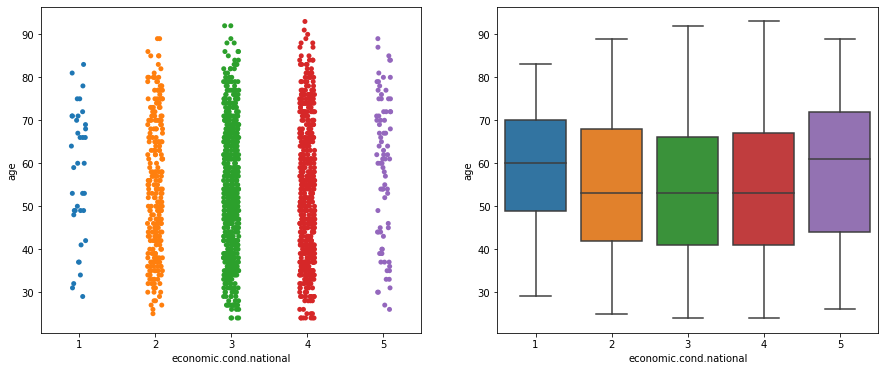

In [35]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['economic.cond.national'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='economic.cond.national',y='age',ax=ax[1])
plt.show()

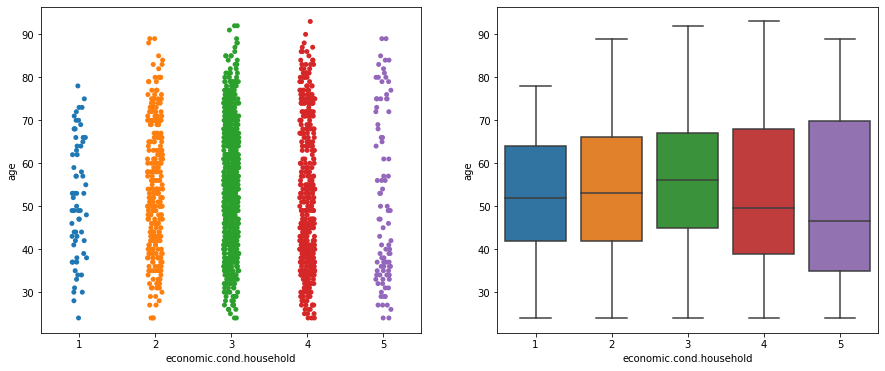

In [36]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['economic.cond.household'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='economic.cond.household',y='age',ax=ax[1])
plt.show()

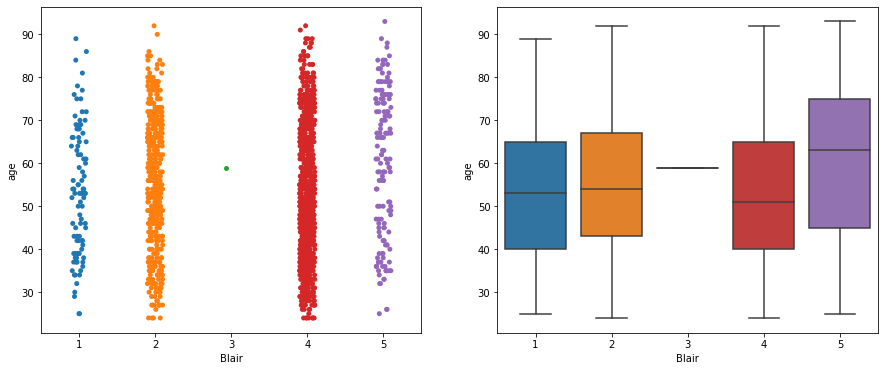

In [37]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['Blair'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='Blair',y='age',ax=ax[1])
plt.show()

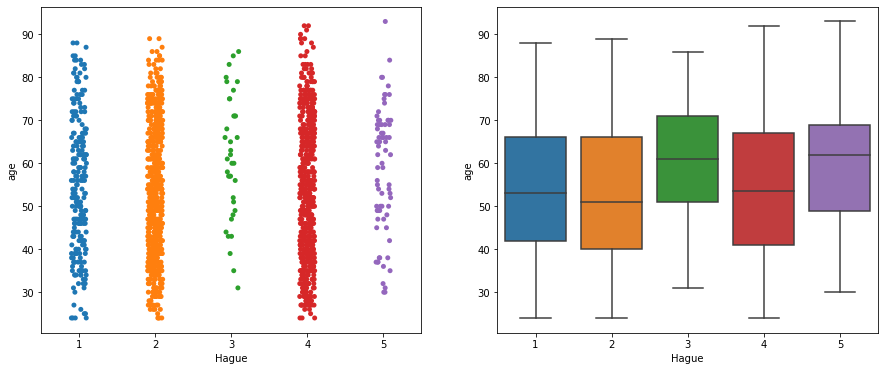

In [38]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['Hague'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='Hague',y='age',ax=ax[1])
plt.show()

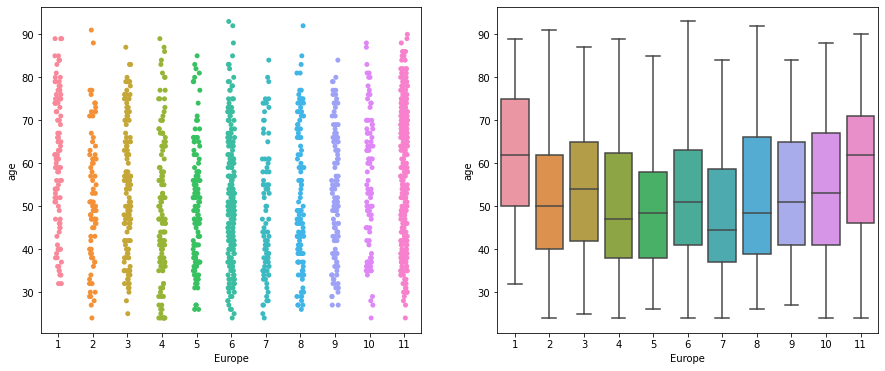

In [39]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['Europe'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='Europe',y='age',ax=ax[1])
plt.show()

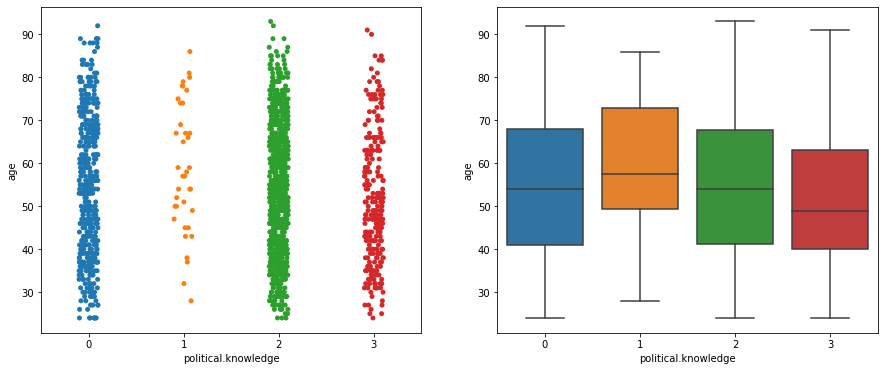

In [40]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.stripplot(ds['political.knowledge'],ds['age'],jitter=True,ax=ax[0])
sns.boxplot(data=ds, x='political.knowledge',y='age',ax=ax[1])
plt.show()

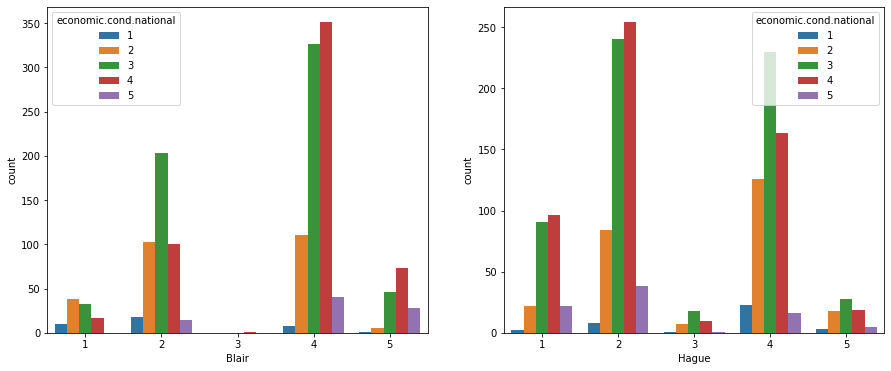

In [41]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['economic.cond.national'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['economic.cond.national'],ax=ax[1])
plt.show()

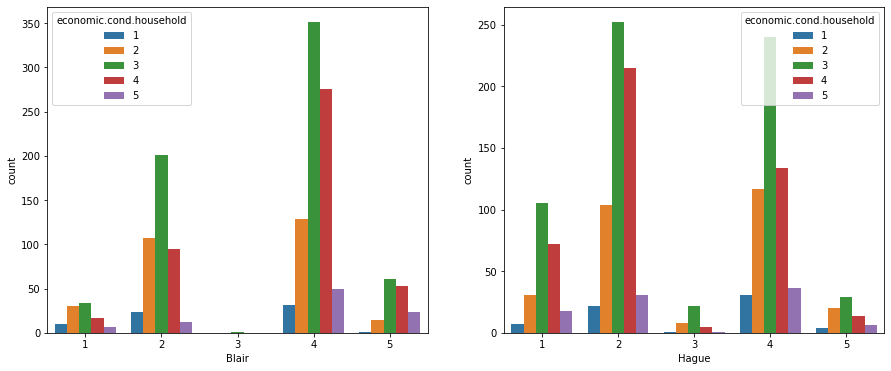

In [42]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['economic.cond.household'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['economic.cond.household'],ax=ax[1])
plt.show()

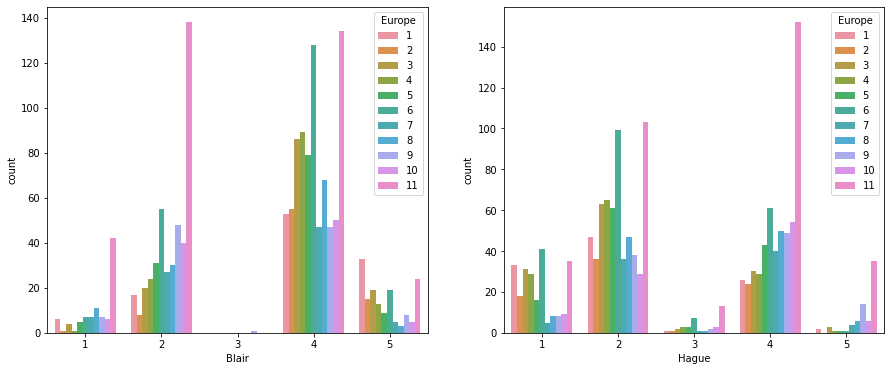

In [43]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['Europe'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['Europe'],ax=ax[1])
plt.show()

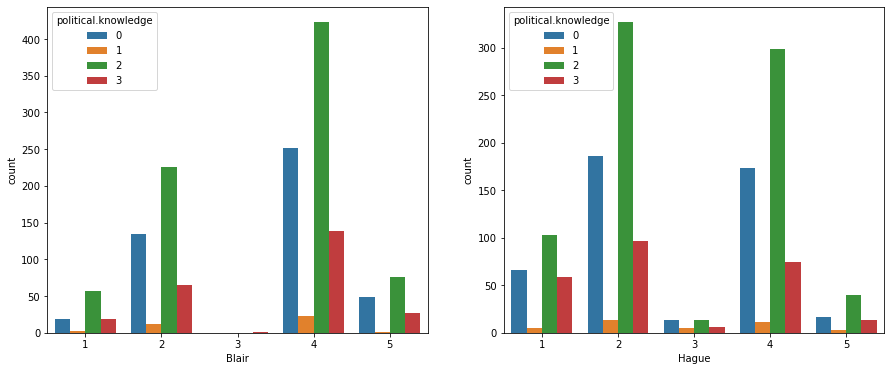

In [44]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['political.knowledge'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['political.knowledge'],ax=ax[1])
plt.show()

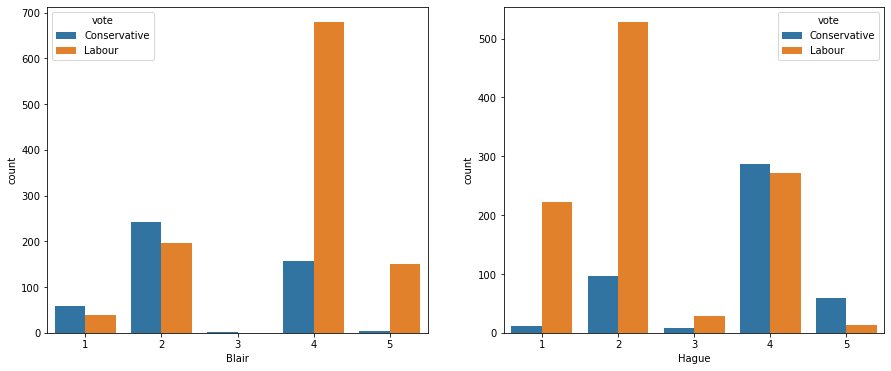

In [45]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['vote'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['vote'],ax=ax[1])
plt.show()

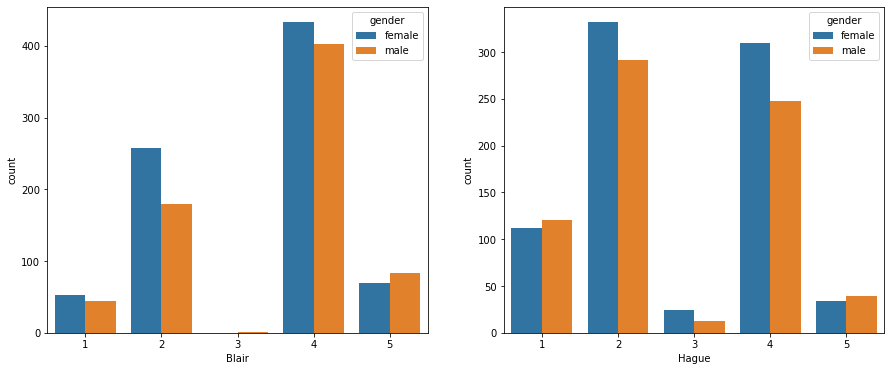

In [46]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.countplot(ds['Blair'],hue=ds['gender'],ax=ax[0])
sns.countplot(ds['Hague'],hue=ds['gender'],ax=ax[1])
plt.show()

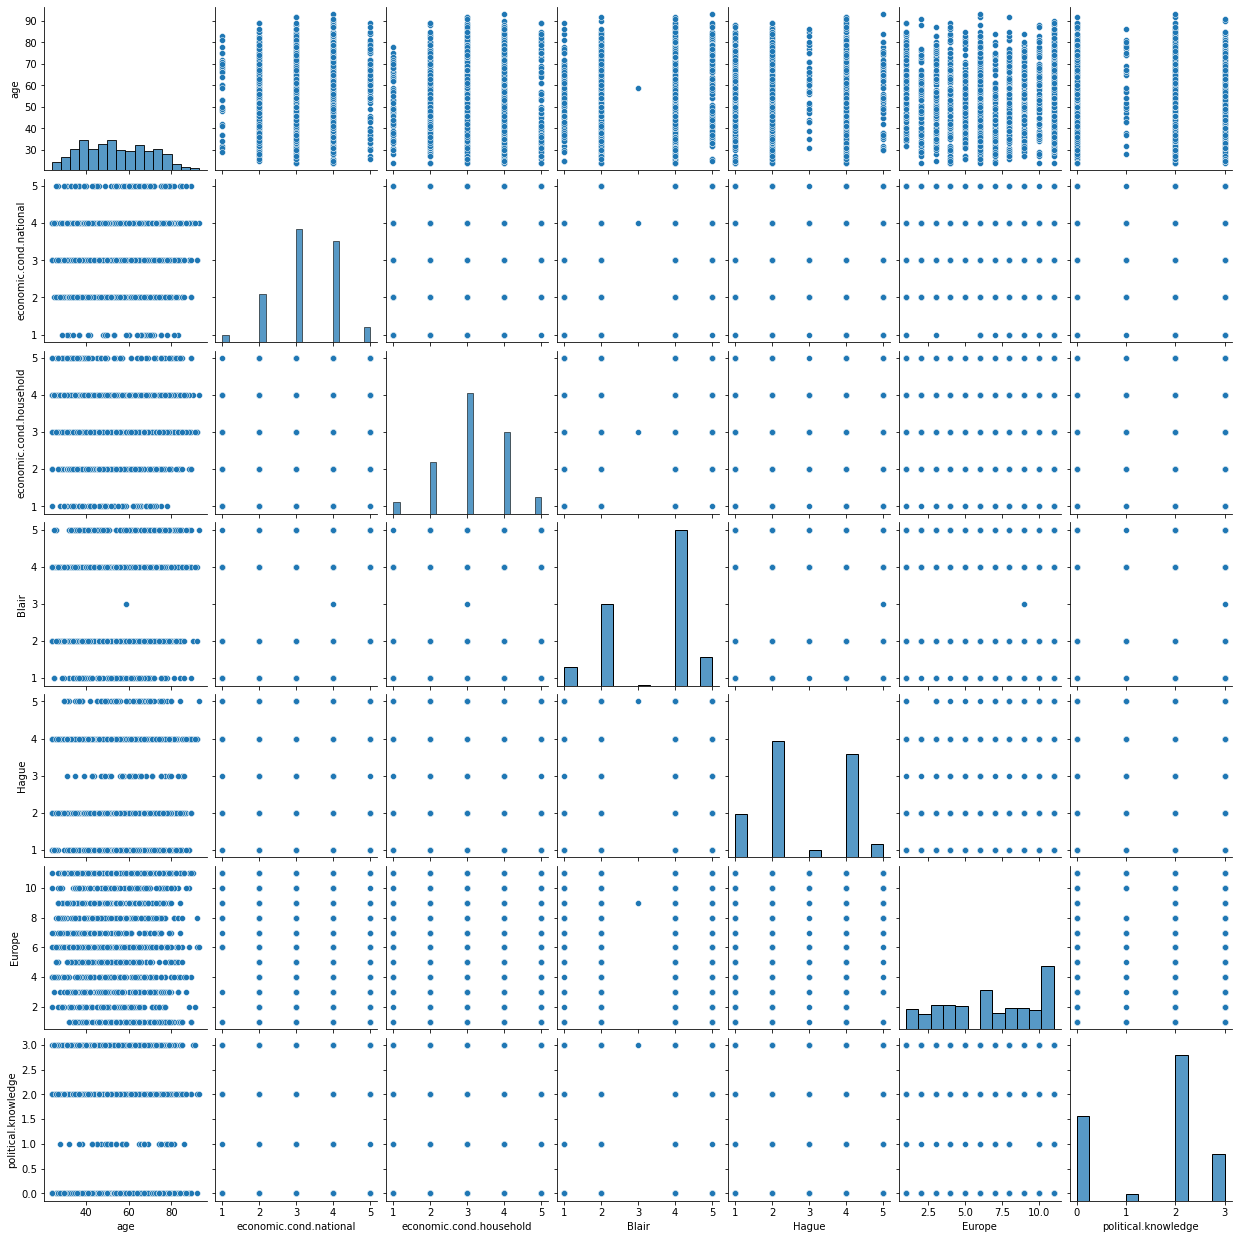

In [47]:
sns.pairplot(ds)

<AxesSubplot:>

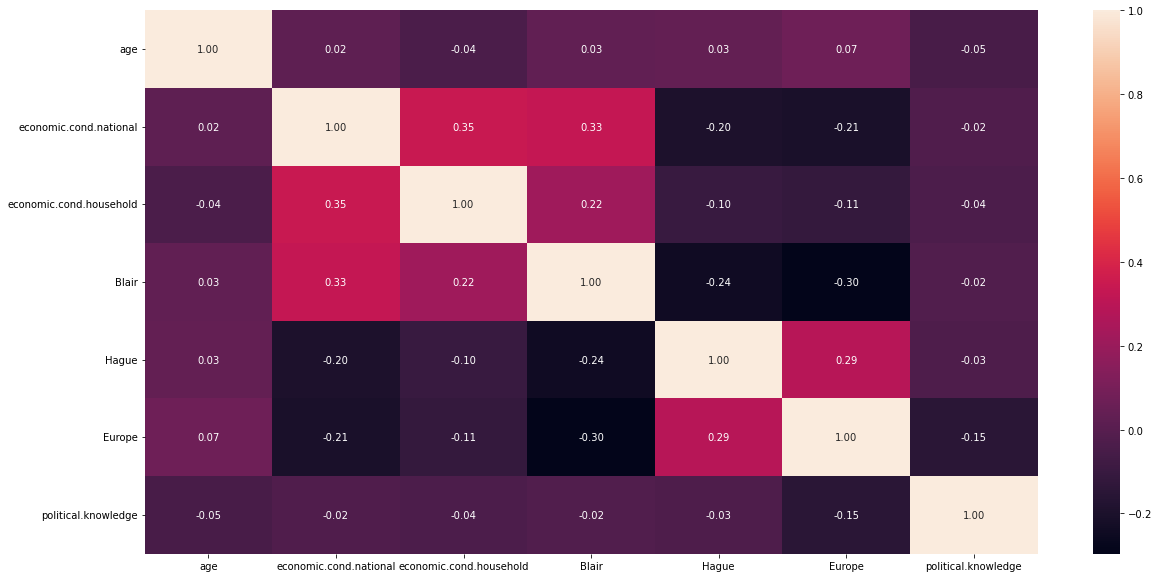

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(ds.corr(),annot=True,fmt=".2f")

In [49]:
cat=[]
num=[]
for i in ds.columns:
    if ds[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['vote', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


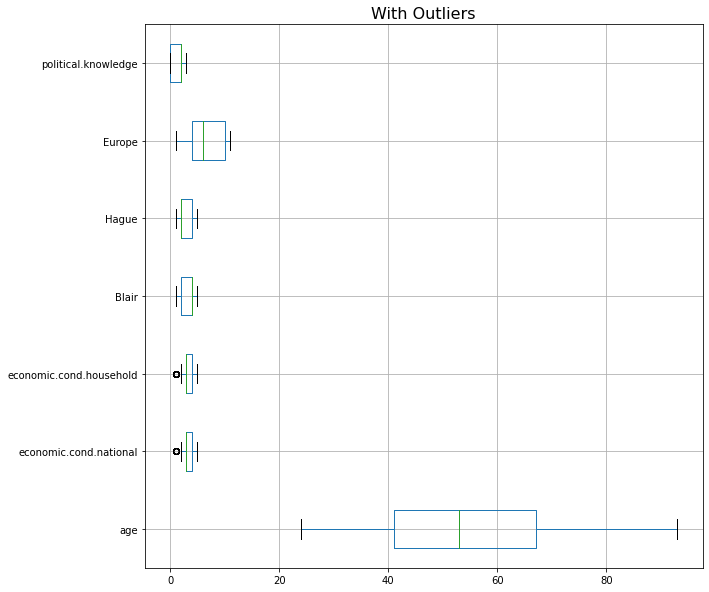

In [50]:
cont=ds.dtypes[(ds.dtypes!='uint8') & (ds.dtypes!='bool')].index
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [52]:
lr,ur=remove_outlier(ds["economic.cond.national"])
ds["economic.cond.national"]=np.where(ds["economic.cond.national"]>ur,ur,ds["economic.cond.national"])
ds["economic.cond.national"]=np.where(ds["economic.cond.national"]<lr,lr,ds["economic.cond.national"])
lr,ur=remove_outlier(ds["economic.cond.household"])
ds["economic.cond.household"]=np.where(ds["economic.cond.household"]>ur,ur,ds["economic.cond.household"])
ds["economic.cond.household"]=np.where(ds["economic.cond.household"]<lr,lr,ds["economic.cond.household"])

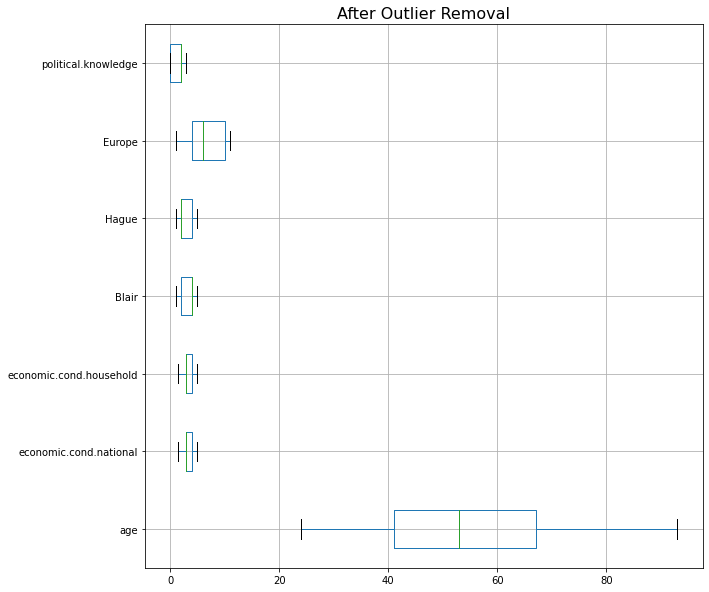

In [53]:
plt.figure(figsize=(10,10))
ds[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [54]:
ds = pd.get_dummies(ds, columns=['vote','gender'],drop_first=True)

In [55]:
ds.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1
5,47,3.0,4.0,4,4,4,2,1,1
6,57,2.0,2.0,4,4,11,2,1,1
7,77,3.0,4.0,4,1,1,0,1,1
8,39,3.0,3.0,4,4,11,0,1,0
9,70,3.0,2.0,5,1,11,2,1,1


In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1525 non-null   int64  
 1   economic.cond.national   1525 non-null   float64
 2   economic.cond.household  1525 non-null   float64
 3   Blair                    1525 non-null   int64  
 4   Hague                    1525 non-null   int64  
 5   Europe                   1525 non-null   int64  
 6   political.knowledge      1525 non-null   int64  
 7   vote_Labour              1525 non-null   uint8  
 8   gender_male              1525 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 130.6 KB


In [57]:
X = ds.drop('vote_Labour', axis=1)
y = ds.pop('vote_Labour')

In [58]:
X.var()

age                        246.842075
economic.cond.national       0.727503
economic.cond.household      0.783731
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
gender_male                  0.249110
dtype: float64

In [59]:
X=X.apply(zscore)
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [60]:
X.var()

age                        1.000656
economic.cond.national     1.000656
economic.cond.household    1.000656
Blair                      1.000656
Hague                      1.000656
Europe                     1.000656
political.knowledge        1.000656
gender_male                1.000656
dtype: float64

### Splitting data into training and test set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [63]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

In [64]:
ds.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


### Checking the dimensions of the training and test data

In [65]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1067, 8)
X_test (458, 8)
y_train (1067,)
y_test (458,)


In [66]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(ds.index))*100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(ds.index))*100))

69.97% data is in training set
30.03% data is in test set


# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### Logistic Regression

In [67]:
logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
logit_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Train Data

In [68]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,logit_model.coef_[0][idx]))

The coefficient for age is -0.32436792683400484
The coefficient for economic.cond.national is 0.3180655481523589
The coefficient for economic.cond.household is 0.15042726714812585
The coefficient for Blair is 0.6695379633363977
The coefficient for Hague is -1.031388930633264
The coefficient for Europe is -0.7846894508296021
The coefficient for political.knowledge is -0.5185276322734004
The coefficient for gender_male is 0.15040947903006044


In [69]:
log_train_acc=logit_model.score(X_train,y_train)
print('The train score of Logistic Regression model is: ',log_train_acc)

The train score of Logistic Regression model is:  0.8406747891283973


In [70]:
y_train_predict_logit_prob=logit_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_logit_prob).head()

,0,1
0,0.618157,0.381843
1,0.188700,0.811300
2,0.184191,0.815809
3,0.170954,0.829046
4,0.050746,0.949254


In [71]:
log_train_acc=logit_model.score(X_train,y_train)
print('The train score of Logistic Regression model is: ',log_train_acc)

The train score of Logistic Regression model is:  0.8406747891283973


In [72]:
y_train_predict_logit=logit_model.predict(X_train)

In [73]:
confusion_matrix(y_train,y_train_predict_logit)

array([[230, 102],
       [ 68, 667]], dtype=int64)

In [74]:
print(classification_report(y_train,y_train_predict_logit))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [75]:
lr_metrics=classification_report(y_train,y_train_predict_logit,output_dict=True) 
ds=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(ds.loc["1"][0],2)
lr_train_recall=round(ds.loc["1"][1],2)
lr_train_f1=round(ds.loc["1"][2],2)
print('lr_train_precision ',lr_train_precision)
print('lr_train_recall ',lr_train_recall)
print('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.87
lr_train_recall  0.91
lr_train_f1  0.89


ROC_AUC score for LR model train dataset is : 0.890


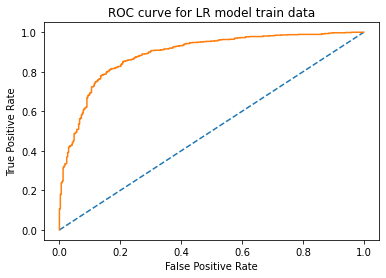

In [76]:
probs = logit_model.predict_proba(X_train) 
probs = probs[:, 1]
log_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for LR model train dataset is : %.3f' % log_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LR model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

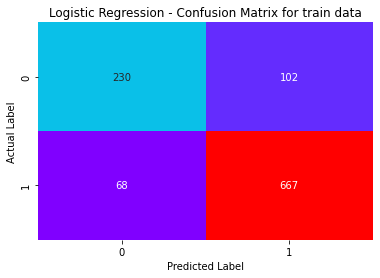

In [77]:
confusion_matrix(y_train,y_train_predict_logit)
sns.heatmap(confusion_matrix(y_train,y_train_predict_logit),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression - Confusion Matrix for train data')
plt.show()

In [78]:
y_train_predict_logit

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Test Data

In [79]:
for idx,col_name in enumerate(X_test.columns):
    print("The coefficient for {} is {}".format(col_name,logit_model.coef_[0][idx]))

The coefficient for age is -0.32436792683400484
The coefficient for economic.cond.national is 0.3180655481523589
The coefficient for economic.cond.household is 0.15042726714812585
The coefficient for Blair is 0.6695379633363977
The coefficient for Hague is -1.031388930633264
The coefficient for Europe is -0.7846894508296021
The coefficient for political.knowledge is -0.5185276322734004
The coefficient for gender_male is 0.15040947903006044


In [80]:
log_test_acc=logit_model.score(X_test,y_test)
print('The test score of Logistic Regression model is: ',log_test_acc)

The test score of Logistic Regression model is:  0.8209606986899564


In [81]:
y_test_predict_logit_prob=logit_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_logit_prob).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


In [82]:
y_test_predict_logit=logit_model.predict(X_test)

In [83]:
confusion_matrix(y_test,y_test_predict_logit)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

In [84]:
print(classification_report(y_test,y_test_predict_logit))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [85]:
lr_metrics=classification_report(y_test,y_test_predict_logit,output_dict=True) 
ds=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(ds.loc["1"][0],2)
lr_test_recall=round(ds.loc["1"][1],2)
lr_test_f1=round(ds.loc["1"][2],2)
print('lr_test_precision ',lr_test_precision)
print('lr_test_recall ',lr_test_recall)
print('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.87
lr_test_recall  0.89
lr_test_f1  0.88


ROC_AUC score for LR model test dataset is : 0.883


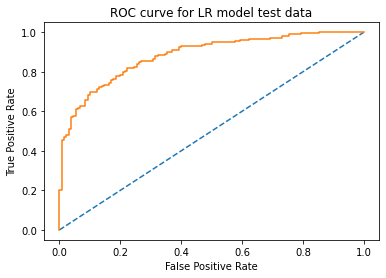

In [86]:
probs = logit_model.predict_proba(X_test) 
probs = probs[:, 1]
log_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for LR model test dataset is : %.3f' % log_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LR model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

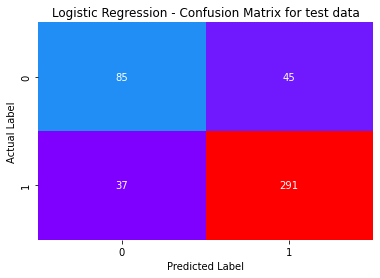

In [87]:
confusion_matrix(y_test,y_test_predict_logit)
sns.heatmap(confusion_matrix(y_test,y_test_predict_logit),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression - Confusion Matrix for test data')
plt.show()

### Training Data and Test Data Confusion Matrix Comparison

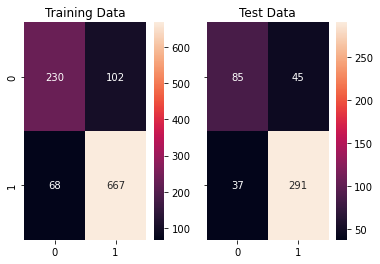

In [88]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict_logit)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict_logit)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Applying GridSearchCV for Logistic Regression

In [89]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [90]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [91]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [93]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [94]:
best_model_lr = grid_search.best_estimator_

In [95]:
y_train_predict_lr = best_model_lr.predict(X_train)
y_test_predict_lr = best_model_lr.predict(X_test)

### Tuned Logistic Regression Model for Train Data

In [96]:
y_train_predict_lr_best=best_model_lr.predict_proba(X_train)
pd.DataFrame(y_train_predict_lr_best).head()

,0,1
0,0.615893,0.384107
1,0.190847,0.809153
2,0.185522,0.814478
3,0.172526,0.827474
4,0.051887,0.948113


In [97]:
print("The Best Logistic Regression Model Score on train data set post tuning is %.3f " % best_model_lr.score(X_train,y_train))

The Best Logistic Regression Model Score on train data set post tuning is 0.841 


In [98]:
confusion_matrix(y_train,y_train_predict_lr)

array([[230, 102],
       [ 68, 667]], dtype=int64)

In [99]:
print(classification_report(y_train,y_train_predict_lr))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



ROC_AUC score for LR tuned model train dataset is : 0.890


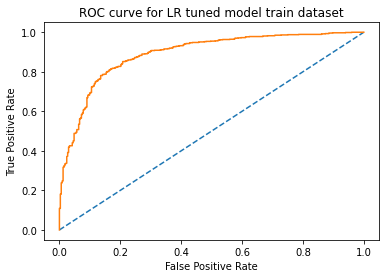

In [100]:
probs = best_model_lr.predict_proba(X_train) 
probs = probs[:, 1]
log_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for LR tuned model train dataset is : %.3f' % log_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LR tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

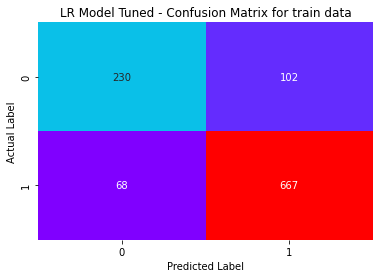

In [101]:
confusion_matrix(y_train,y_train_predict_lr)
sns.heatmap(confusion_matrix(y_train,y_train_predict_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LR Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned Logistic Regression Model for Test Data

In [102]:
y_test_predict_lr_best=best_model_lr.predict_proba(X_test)
pd.DataFrame(y_test_predict_lr_best).head()

,0,1
0,0.919962,0.080038
1,0.688017,0.311983
2,0.347392,0.652608
3,0.487600,0.512400
4,0.161237,0.838763


In [103]:
print("The Best Logistic Regression Model Score on test data set post tuning is %.3f " % best_model_lr.score(X_test,y_test))

The Best Logistic Regression Model Score on test data set post tuning is 0.821 


In [104]:
confusion_matrix(y_test,y_test_predict_lr)

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

In [105]:
print(classification_report(y_test,y_test_predict_lr))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



ROC_AUC score for LR tuned model test dataset is : 0.883


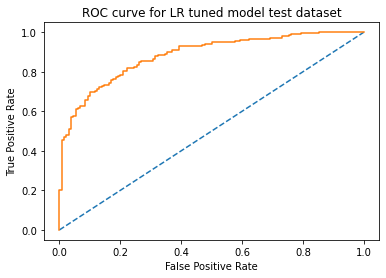

In [106]:
probs = best_model_lr.predict_proba(X_test) 
probs = probs[:, 1]
log_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for LR tuned model test dataset is : %.3f' % log_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LR tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

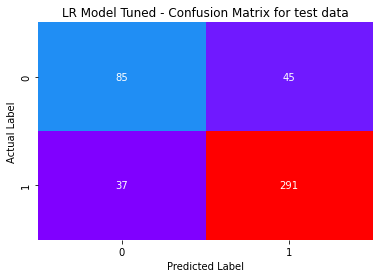

In [107]:
confusion_matrix(y_test,y_test_predict_lr)
sns.heatmap(confusion_matrix(y_test,y_test_predict_lr),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LR Model Tuned - Confusion Matrix for test data')
plt.show()

### Linear Discriminant Analysis

In [108]:
lda_model= LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [109]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,lda_model.coef_[0][idx]))

The coefficient for age is -0.40295232549954096
The coefficient for economic.cond.national is 0.3216984319088608
The coefficient for economic.cond.household is 0.14163934606795187
The coefficient for Blair is 0.8238323476613127
The coefficient for Hague is -1.1899566071378398
The coefficient for Europe is -0.8530076203223016
The coefficient for political.knowledge is -0.617380791075102
The coefficient for gender_male is 0.12459722786136433


### Train Data

In [110]:
ldc_train_acc=lda_model.score(X_train,y_train)
print('The train score of Linear Discriminant Analysis model is: ',ldc_train_acc)

The train score of Linear Discriminant Analysis model is:  0.8397375820056232


In [111]:
y_train_predict_lda_prob=lda_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_lda_prob).head()

,0,1
0,0.648650,0.351350
1,0.162890,0.837110
2,0.180964,0.819036
3,0.137686,0.862314
4,0.038738,0.961262


In [112]:
y_train_predict_lda=lda_model.predict(X_train)

In [113]:
confusion_matrix(y_train, y_train_predict_lda)

array([[236,  96],
       [ 75, 660]], dtype=int64)

In [114]:
print(classification_report(y_train, y_train_predict_lda))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [115]:
lda_metrics=classification_report(y_train,y_train_predict_lda,output_dict=True) 
ds=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(ds.loc["1"][0],2)
lda_train_recall=round(ds.loc["1"][1],2)
lda_train_f1=round(ds.loc["1"][2],2)
print('lda_train_precision ',lda_train_precision)
print('lda_train_recall ',lda_train_recall)
print('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.87
lda_train_recall  0.9
lda_train_f1  0.89


ROC_AUC score for LDA model train dataset is : 0.889


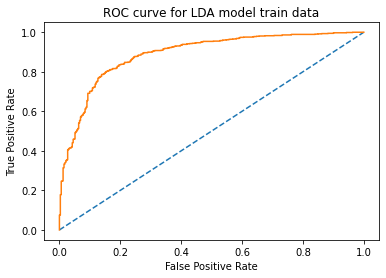

In [116]:
probs = lda_model.predict_proba(X_train) 
probs = probs[:, 1]
ldc_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for LDA model train dataset is : %.3f' % ldc_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

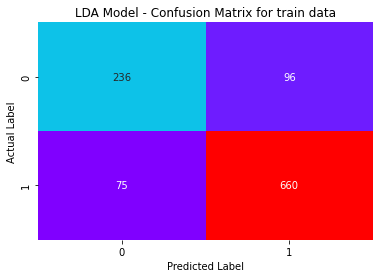

In [117]:
confusion_matrix(y_train,y_train_predict_lda)
sns.heatmap(confusion_matrix(y_train,y_train_predict_lda),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LDA Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [118]:
for idx,col_name in enumerate(X_test.columns):
    print("The coefficient for {} is {}".format(col_name,lda_model.coef_[0][idx]))

The coefficient for age is -0.40295232549954096
The coefficient for economic.cond.national is 0.3216984319088608
The coefficient for economic.cond.household is 0.14163934606795187
The coefficient for Blair is 0.8238323476613127
The coefficient for Hague is -1.1899566071378398
The coefficient for Europe is -0.8530076203223016
The coefficient for political.knowledge is -0.617380791075102
The coefficient for gender_male is 0.12459722786136433


In [119]:
ldc_test_acc=lda_model.score(X_test,y_test)
print('The test score of Linear Discriminant Analysis model is: ',ldc_test_acc)

The test score of Linear Discriminant Analysis model is:  0.8187772925764192


In [120]:
y_test_predict_lda_prob=lda_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_lda_prob).head()

,0,1
0,0.943417,0.056583
1,0.743056,0.256944
2,0.340433,0.659567
3,0.496549,0.503451
4,0.140949,0.859051


In [121]:
y_test_predict_lda=lda_model.predict(X_test)

In [122]:
confusion_matrix(y_test, y_test_predict_lda)

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [123]:
print(classification_report(y_test, y_test_predict_lda))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [124]:
lda_metrics=classification_report(y_test,y_test_predict_lda,output_dict=True) 
ds=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(ds.loc["1"][0],2)
lda_test_recall=round(ds.loc["1"][1],2)
lda_test_f1=round(ds.loc["1"][2],2)
print('lda_test_precision ',lda_test_precision)
print('lda_test_recall ',lda_test_recall)
print('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.87
lda_test_recall  0.88
lda_test_f1  0.87


ROC_AUC score for LDA model test dataset is : 0.884


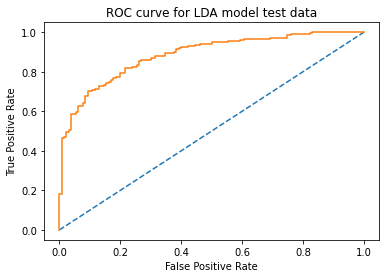

In [125]:
probs = lda_model.predict_proba(X_test) 
probs = probs[:, 1]
ldc_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for LDA model test dataset is : %.3f' % ldc_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

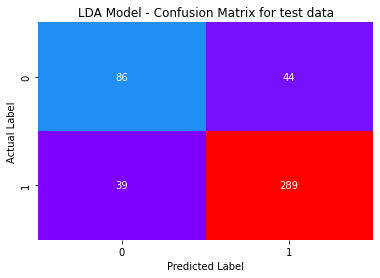

In [126]:
confusion_matrix(y_test,y_test_predict_lda)
sns.heatmap(confusion_matrix(y_test,y_test_predict_lda),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LDA Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for Linear Discriminant Analysis 

In [127]:
grid_lda = {'solver':['svd','lsqr','eigen']}
grid_search_lda = GridSearchCV(estimator=lda_model,param_grid=grid_lda,cv=10,n_jobs=2)
grid_search_lda.fit(X_train,y_train)
best_model_lda=grid_search_lda.best_estimator_

In [128]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


### Tuned LDA Model for Train Data

In [129]:
y_train_predict_lda_best = best_model_lda.predict(X_train)
y_test_predict_lda_best = best_model_lda.predict(X_test)

In [130]:
y_train_predict_best_prob = best_model_lda.predict_proba(X_train)
pd.DataFrame(y_train_predict_best_prob).head()

,0,1
0,0.648650,0.351350
1,0.162890,0.837110
2,0.180964,0.819036
3,0.137686,0.862314
4,0.038738,0.961262


In [131]:
print("The Best Linear Discriminant Analysis Score on train data set post tuning is %.3f " % best_model_lda.score(X_train,y_train))

The Best Linear Discriminant Analysis Score on train data set post tuning is 0.840 


In [132]:
confusion_matrix(y_train,y_train_predict_lda_best)

array([[236,  96],
       [ 75, 660]], dtype=int64)

In [133]:
print(classification_report(y_train,y_train_predict_lda_best))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



ROC_AUC score for LDA tuned model train dataset is : 0.889


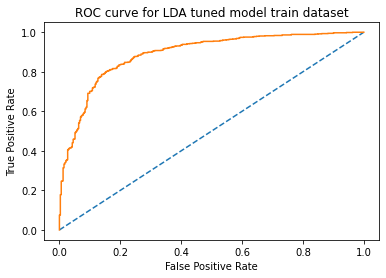

In [134]:
probs = best_model_lda.predict_proba(X_train) 
probs = probs[:, 1]
ldc_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for LDA tuned model train dataset is : %.3f' % ldc_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

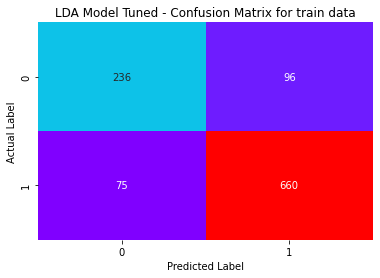

In [135]:
confusion_matrix(y_train,y_train_predict_lda_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_lda_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LDA Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned LDA Model for Test Data

In [136]:
y_test_predict_best_prob = best_model_lda.predict_proba(X_test)
pd.DataFrame(y_test_predict_best_prob).head()

,0,1
0,0.943417,0.056583
1,0.743056,0.256944
2,0.340433,0.659567
3,0.496549,0.503451
4,0.140949,0.859051


In [137]:
print("The Best Linear Discriminant Analysis Score on test data set post tuning is %.3f " % best_model_lda.score(X_test,y_test))

The Best Linear Discriminant Analysis Score on test data set post tuning is 0.819 


In [138]:
confusion_matrix(y_test,y_test_predict_lda_best)

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [139]:
print(classification_report(y_test,y_test_predict_lda_best))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



ROC_AUC score for LDA tuned model test dataset is : 0.884


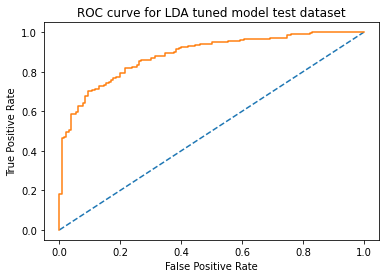

In [140]:
probs = best_model_lda.predict_proba(X_test) 
probs = probs[:, 1]
ldc_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for LDA tuned model test dataset is : %.3f' % ldc_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for LDA tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

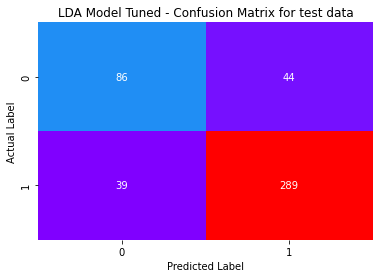

In [141]:
confusion_matrix(y_test,y_test_predict_lda_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_lda_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LDA Model Tuned - Confusion Matrix for test data')
plt.show()

In [142]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR_Train':[log_train_acc,log_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'LR_Test':[log_test_acc,log_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
'LDA_Train':[ldc_train_acc,ldc_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
'LDA_Test':[ldc_test_acc,ldc_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,LR_Train,LR_Test,LDA_Train,LDA_Test
Accuracy,0.84,0.82,0.84,0.82
AUC,0.89,0.88,0.89,0.88
Recall,0.91,0.89,0.90,0.88
Precision,0.87,0.87,0.87,0.87
F1 Score,0.89,0.88,0.89,0.87


# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

### KNN Model

### Train Data

In [143]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
y_train_predict_knn = knn_model.predict(X_train)

In [145]:
knn_model_score_train = knn_model.score(X_train, y_train)
print('The train score of KNN model is: ',knn_model_score_train)

The train score of KNN model is:  0.8641049671977507


In [146]:
confusion_matrix(y_train, y_train_predict_knn)

array([[249,  83],
       [ 62, 673]], dtype=int64)

In [147]:
print(metrics.classification_report(y_train, y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [148]:
knn_metrics=classification_report(y_train,y_train_predict_knn,output_dict=True) 
ds=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(ds.loc["1"][0],2)
knn_train_recall=round(ds.loc["1"][1],2)
knn_train_f1=round(ds.loc["1"][2],2)
print('knn_train_precision ',knn_train_precision)
print('knn_train_recall ',knn_train_recall)
print('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.89
knn_train_recall  0.92
knn_train_f1  0.9


ROC_AUC score for KNN model train dataset is : 0.930


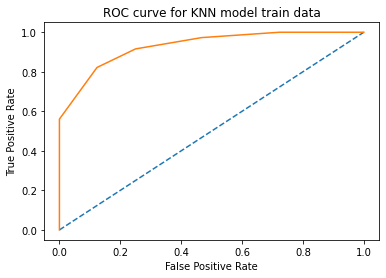

In [149]:
probs = knn_model.predict_proba(X_train) 
probs = probs[:, 1]
knn_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for KNN model train dataset is : %.3f' % knn_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

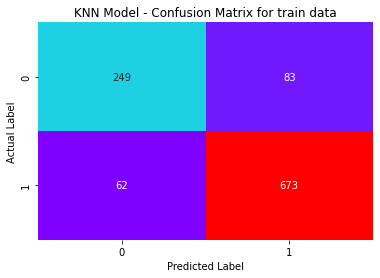

In [150]:
confusion_matrix(y_train,y_train_predict_knn)
sns.heatmap(confusion_matrix(y_train,y_train_predict_knn),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [151]:
y_test_predict_knn = knn_model.predict(X_test)

In [152]:
knn_model_score_test = knn_model.score(X_test, y_test)
print('The test score of KNN model is: ',knn_model_score_test)

The test score of KNN model is:  0.8187772925764192


In [153]:
confusion_matrix(y_test, y_test_predict_knn)

array([[ 91,  39],
       [ 44, 284]], dtype=int64)

In [154]:
print(metrics.classification_report(y_test, y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [155]:
knn_metrics=classification_report(y_test,y_test_predict_knn,output_dict=True) 
ds=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(ds.loc["1"][0],2)
knn_test_recall=round(ds.loc["1"][1],2)
knn_test_f1=round(ds.loc["1"][2],2)
print('knn_test_precision ',knn_test_precision)
print('knn_test_recall ',knn_test_recall)
print('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.88
knn_test_recall  0.87
knn_test_f1  0.87


ROC_AUC score for KNN model test dataset is : 0.869


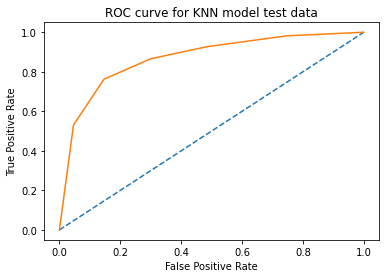

In [156]:
probs = knn_model.predict_proba(X_test) 
probs = probs[:, 1]
knn_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for KNN model test dataset is : %.3f' % knn_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

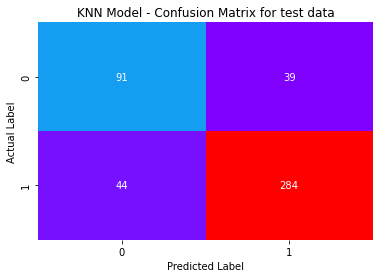

In [157]:
confusion_matrix(y_test,y_test_predict_knn)
sns.heatmap(confusion_matrix(y_test,y_test_predict_knn),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Model - Confusion Matrix for test data')
plt.show()

In [158]:
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)# evaluate test accuracy
    scores=knn.score(X_test,y_test)
    ac_scores.append(scores)
    # changing to misclassification error

MCE=[1 - x for x in ac_scores]
MCE

[0.22707423580786024,
 0.1899563318777293,
 0.18122270742358082,
 0.17903930131004364,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17903930131004364,
 0.16593886462882101,
 0.17030567685589515]

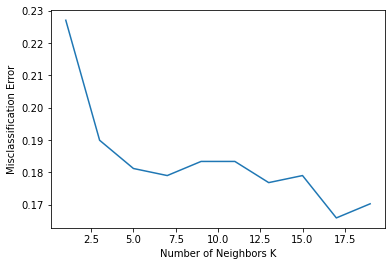

In [159]:
plt.plot(range(1,20,2),MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Applying GridSearchCV for KNN Model

In [160]:
grid={'n_neighbors':[10,20,30],
     'leaf_size':[20,30,50],
     'p':[1,2]}

In [161]:
knn_model_best = KNeighborsClassifier()
knn_model_best.fit(X_train,y_train)

KNeighborsClassifier()

In [162]:
grid_search = GridSearchCV(estimator = knn_model_best,param_grid = grid,cv=5)

In [163]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 50], 'n_neighbors': [10, 20, 30],
                         'p': [1, 2]})

In [164]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'leaf_size': 20, 'n_neighbors': 10, 'p': 1} 

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)


In [165]:
y_train_predict_knn_best = knn_model_best.predict(X_train)
y_test_predict_knn_best = knn_model_best.predict(X_test)

### Tuned KNN Model for Train Data

In [166]:
y_train_predict_knn_best_prob=knn_model_best.predict_proba(X_train)
pd.DataFrame(y_train_predict_knn_best_prob).head()

,0,1
0,0.6,0.4
1,0.2,0.8
2,0.2,0.8
3,0.2,0.8
4,0.2,0.8


In [167]:
print("The Best KNN Model Score on train data set post tuning is %.3f " % knn_model_best.score(X_train,y_train))

The Best KNN Model Score on train data set post tuning is 0.864 


In [168]:
confusion_matrix(y_train,y_train_predict_knn_best)

array([[249,  83],
       [ 62, 673]], dtype=int64)

In [169]:
print(classification_report(y_train,y_train_predict_knn_best))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



ROC_AUC score for KNN tuned model train dataset is : 0.930


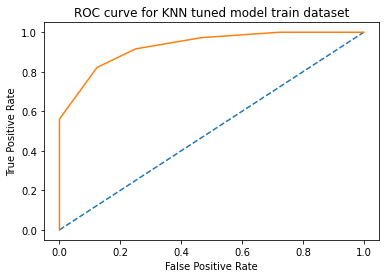

In [170]:
probs = knn_model_best.predict_proba(X_train) 
probs = probs[:, 1]
knn_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for KNN tuned model train dataset is : %.3f' % knn_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

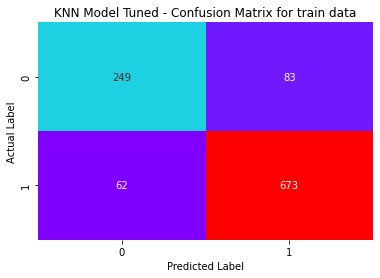

In [171]:
confusion_matrix(y_train,y_train_predict_knn_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_knn_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned KNN Model for Test Data

In [172]:
y_test_predict_knn_best_prob=knn_model_best.predict_proba(X_test)
pd.DataFrame(y_test_predict_knn_best_prob).head()

,0,1
0,0.6,0.4
1,0.8,0.2
2,0.4,0.6
3,0.4,0.6
4,0.0,1.0


In [173]:
print("The Best KNN Model Score on test data set post tuning is %.3f " % knn_model_best.score(X_test,y_test))

The Best KNN Model Score on test data set post tuning is 0.819 


In [174]:
confusion_matrix(y_test,y_test_predict_knn_best)

array([[ 91,  39],
       [ 44, 284]], dtype=int64)

In [175]:
print(classification_report(y_test,y_test_predict_knn_best))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



ROC_AUC score for KNN tuned model test dataset is : 0.869


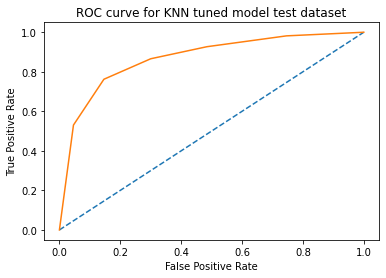

In [176]:
probs = knn_model_best.predict_proba(X_test) 
probs = probs[:, 1]
knn_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for KNN tuned model test dataset is : %.3f' % knn_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for KNN tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

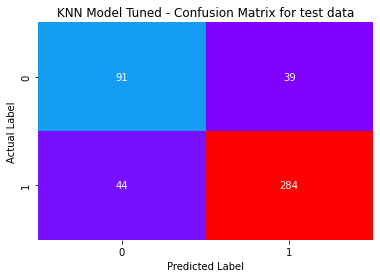

In [177]:
confusion_matrix(y_test,y_test_predict_knn_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_knn_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Model Tuned - Confusion Matrix for test data')
plt.show()

### Naïve Bayes Model

### Train Data

In [178]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [179]:
y_train_predict_nb = nb_model.predict(X_train)

In [180]:
nb_model_score_train = nb_model.score(X_train, y_train)
print('The train score of NB model is: ',nb_model_score_train)

The train score of NB model is:  0.8322399250234301


In [181]:
confusion_matrix(y_train, y_train_predict_nb)

array([[240,  92],
       [ 87, 648]], dtype=int64)

In [182]:
print(metrics.classification_report(y_train, y_train_predict_nb))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [183]:
nb_metrics=classification_report(y_train,y_train_predict_nb,output_dict=True) 
ds=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(ds.loc["1"][0],2)
nb_train_recall=round(ds.loc["1"][1],2)
nb_train_f1=round(ds.loc["1"][2],2)
print('nb_train_precision ',nb_train_precision)
print('nb_train_recall ',nb_train_recall)
print('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.88
nb_train_recall  0.88
nb_train_f1  0.88


ROC_AUC score for NB model train dataset is : 0.887


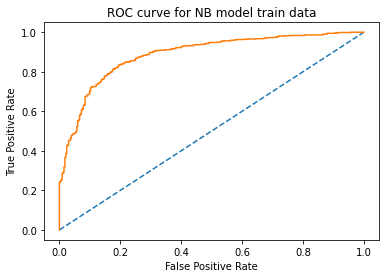

In [184]:
probs = nb_model.predict_proba(X_train) 
probs = probs[:, 1]
nb_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for NB model train dataset is : %.3f' % nb_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for NB model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

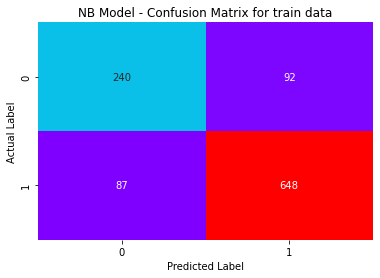

In [185]:
confusion_matrix(y_train,y_train_predict_nb)
sns.heatmap(confusion_matrix(y_train,y_train_predict_nb),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [186]:
y_test_predict_nb = nb_model.predict(X_test)

In [187]:
nb_model_score_test = nb_model.score(X_test, y_test)
print('The test score of NB model is: ',nb_model_score_test)

The test score of NB model is:  0.8231441048034934


In [188]:
confusion_matrix(y_test, y_test_predict_nb)

array([[ 94,  36],
       [ 45, 283]], dtype=int64)

In [189]:
print(metrics.classification_report(y_test, y_test_predict_nb))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [190]:
nb_metrics=classification_report(y_test,y_test_predict_nb,output_dict=True) 
ds=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(ds.loc["1"][0],2)
nb_test_recall=round(ds.loc["1"][1],2)
nb_test_f1=round(ds.loc["1"][2],2)
print('nb_test_precision ',nb_test_precision)
print('nb_test_recall ',nb_test_recall)
print('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.89
nb_test_recall  0.86
nb_test_f1  0.87


ROC_AUC score for NB model test dataset is : 0.885


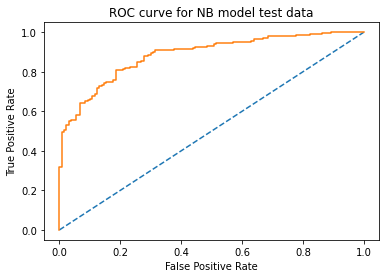

In [191]:
probs = nb_model.predict_proba(X_test) 
probs = probs[:, 1]
nb_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for NB model test dataset is : %.3f' % nb_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for NB model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

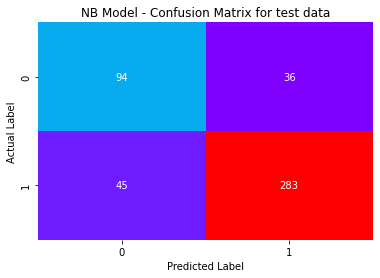

In [192]:
confusion_matrix(y_test,y_test_predict_nb)
sns.heatmap(confusion_matrix(y_test,y_test_predict_nb),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for NB Model

In [193]:
grid = {'var_smoothing':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

In [194]:
nb_model_best = GaussianNB()
nb_model_best.fit(X_train,y_train)

GaussianNB()

In [195]:
grid_search = GridSearchCV(estimator=nb_model_best,param_grid=grid,cv=5,n_jobs=-1,verbose=2)

In [196]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001]},
             verbose=2)

In [197]:
y_train_predict_nb_best = nb_model_best.predict(X_train)
y_test_predict_nb_best = nb_model_best.predict(X_test)

### Tuned NB Model for Train Data

In [198]:
y_train_predict_nb_best_prob=nb_model_best.predict_proba(X_train)
pd.DataFrame(y_train_predict_nb_best_prob).head()

,0,1
0,0.730285,0.269715
1,0.282791,0.717209
2,0.102563,0.897437
3,0.171117,0.828883
4,0.022907,0.977093


In [199]:
print("The Best NB Model Score on train data set post tuning is %.3f " % nb_model_best.score(X_train,y_train))

The Best NB Model Score on train data set post tuning is 0.832 


In [200]:
confusion_matrix(y_train,y_train_predict_nb_best)

array([[240,  92],
       [ 87, 648]], dtype=int64)

In [201]:
print(classification_report(y_train,y_train_predict_nb_best))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



ROC_AUC score for NB tuned model train dataset is : 0.887


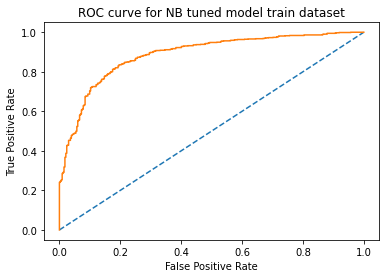

In [202]:
probs = nb_model_best.predict_proba(X_train) 
probs = probs[:, 1]
nb_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for NB tuned model train dataset is : %.3f' % nb_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for NB tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

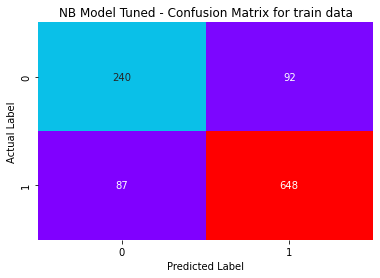

In [203]:
confusion_matrix(y_train,y_train_predict_nb_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_nb_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned NB Model for Test Data

In [204]:
y_test_predict_nb_best_prob=nb_model_best.predict_proba(X_test)
pd.DataFrame(y_test_predict_nb_best_prob).head()

,0,1
0,0.985393,0.014607
1,0.879810,0.120190
2,0.452403,0.547597
3,0.550728,0.449272
4,0.254818,0.745182


In [205]:
print("The Best NB Model Score on test data set post tuning is %.3f " % nb_model_best.score(X_test,y_test))

The Best NB Model Score on test data set post tuning is 0.823 


In [206]:
confusion_matrix(y_test,y_test_predict_nb_best)

array([[ 94,  36],
       [ 45, 283]], dtype=int64)

In [207]:
print(classification_report(y_test,y_test_predict_nb_best))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



ROC_AUC score for NB tuned model test dataset is : 0.885


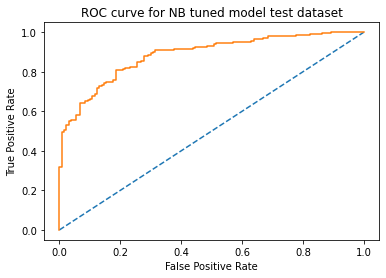

In [208]:
probs = nb_model_best.predict_proba(X_test) 
probs = probs[:, 1]
nb_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for NB tuned model test dataset is : %.3f' % nb_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for NB tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

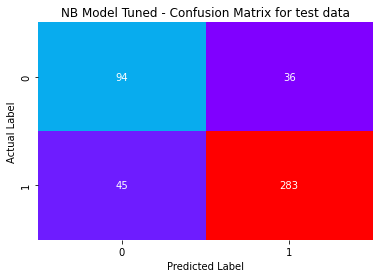

In [209]:
confusion_matrix(y_test,y_test_predict_nb_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_nb_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('NB Model Tuned - Confusion Matrix for test data')
plt.show()

In [210]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN_Train':[knn_model_score_train,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
'KNN_Test':[knn_model_score_train,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
'NB_Train':[nb_model_score_train,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
'NB_Test':[nb_model_score_test,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index)
round(data,2)

,KNN_Train,KNN_Test,NB_Train,NB_Test
Accuracy,0.86,0.86,0.83,0.82
AUC,0.93,0.87,0.89,0.88
Recall,0.92,0.87,0.88,0.86
Precision,0.89,0.88,0.88,0.89
F1 Score,0.90,0.87,0.88,0.87


# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

### Decision Tree Classifier

### Train Data

In [211]:
dt_model= tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [212]:
y_train_predict_dt = dt_model.predict(X_train)

In [213]:
dt_model_score_train = dt_model.score(X_train, y_train)
print('The train score of Decision Tree model is: ',dt_model_score_train)

The train score of Decision Tree model is:  0.9990627928772259


In [214]:
confusion_matrix(y_train, y_train_predict_dt)

array([[332,   0],
       [  1, 734]], dtype=int64)

In [215]:
print(metrics.classification_report(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [216]:
dt_metrics=classification_report(y_train,y_train_predict_dt,output_dict=True) 
ds=pd.DataFrame(dt_metrics).transpose()
dt_train_precision=round(ds.loc["1"][0],2)
dt_train_recall=round(ds.loc["1"][1],2)
dt_train_f1=round(ds.loc["1"][2],2)
print('dt_train_precision ',dt_train_precision)
print('dt_train_recall ',dt_train_recall)
print('dt_train_f1 ',dt_train_f1)

dt_train_precision  1.0
dt_train_recall  1.0
dt_train_f1  1.0


ROC_AUC score for Decision Tree model train dataset is : 1.000


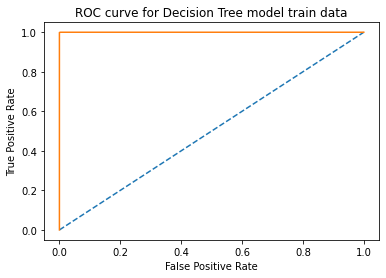

In [217]:
probs = dt_model.predict_proba(X_train) 
probs = probs[:, 1]
dt_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for Decision Tree model train dataset is : %.3f' % dt_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

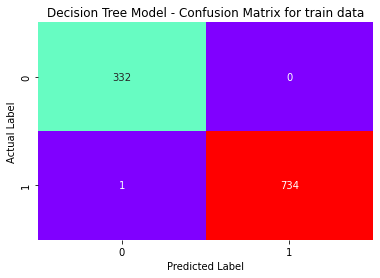

In [218]:
confusion_matrix(y_train,y_train_predict_dt)
sns.heatmap(confusion_matrix(y_train,y_train_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [219]:
dt_model.fit(X_test, y_test)

DecisionTreeClassifier()

In [220]:
y_test_predict_dt = dt_model.predict(X_test)

In [221]:
dt_model_score_test = dt_model.score(X_test, y_test)
print('The test score of Decision Tree model is: ',dt_model_score_test)

The test score of Decision Tree model is:  1.0


In [222]:
confusion_matrix(y_test, y_test_predict_dt)

array([[130,   0],
       [  0, 328]], dtype=int64)

In [223]:
print(metrics.classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       328

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



In [224]:
dt_metrics=classification_report(y_test,y_test_predict_dt,output_dict=True) 
ds=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(ds.loc["1"][0],2)
dt_test_recall=round(ds.loc["1"][1],2)
dt_test_f1=round(ds.loc["1"][2],2)
print('dt_test_precision ',dt_test_precision)
print('dt_test_recall ',dt_test_recall)
print('dt_test_f1 ',dt_test_f1)

dt_test_precision  1.0
dt_test_recall  1.0
dt_test_f1  1.0


ROC_AUC score for Decision Tree model test dataset is : 1.000


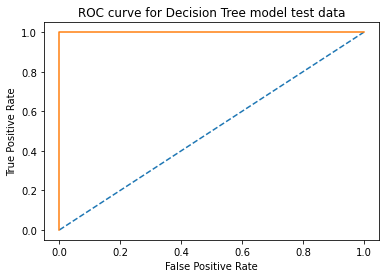

In [225]:
probs = dt_model.predict_proba(X_test) 
probs = probs[:, 1]
dt_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for Decision Tree model test dataset is : %.3f' % dt_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

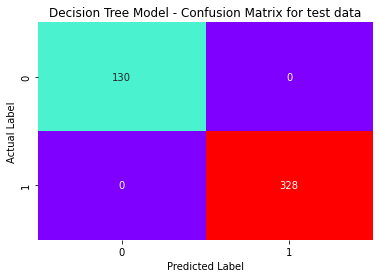

In [226]:
confusion_matrix(y_test,y_test_predict_dt)
sns.heatmap(confusion_matrix(y_test,y_test_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for Decision Tree Classifier

In [227]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [228]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [229]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [230]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [231]:
y_train_predict_dtcl=best_grid_dtcl.predict(X_train)
y_test_predict_dtcl=best_grid_dtcl.predict(X_test)

### Tuned DT Model for Train Data

In [232]:
y_train_predict_dtcl
y_train_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_train)
y_train_predict_prob_dtcl
pd.DataFrame(y_train_predict_prob_dtcl).head()

,0,1
0,0.464286,0.535714
1,0.464286,0.535714
2,0.195489,0.804511
3,0.224490,0.775510
4,0.195489,0.804511


In [233]:
print("The Best DT Model Score on train data set post tuning is %.3f " % grid_search_dtcl.score(X_train,y_train))

The Best DT Model Score on train data set post tuning is 0.826 


In [234]:
confusion_matrix(y_train,y_train_predict_dtcl)

array([[200, 132],
       [ 54, 681]], dtype=int64)

In [235]:
print(classification_report(y_train,y_train_predict_dtcl))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       332
           1       0.84      0.93      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.76      0.78      1067
weighted avg       0.82      0.83      0.82      1067



ROC_AUC score for DTCL tuned model train dataset is : 0.865


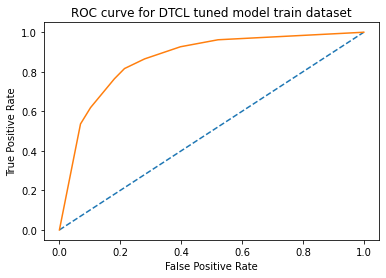

In [236]:
probs = grid_search_dtcl.predict_proba(X_train) 
probs = probs[:, 1]
dtcl_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for DTCL tuned model train dataset is : %.3f' % dtcl_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for DTCL tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

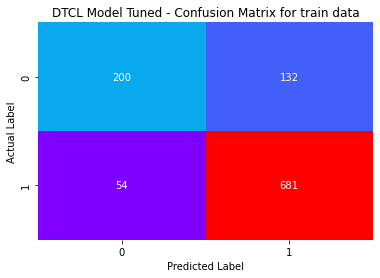

In [237]:
confusion_matrix(y_train,y_train_predict_dtcl)
sns.heatmap(confusion_matrix(y_train,y_train_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DTCL Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned DT Model for Test Data

In [238]:
y_test_predict_dtcl
y_test_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
y_test_predict_prob_dtcl
pd.DataFrame(y_test_predict_prob_dtcl).head()

,0,1
0,0.850267,0.149733
1,0.850267,0.149733
2,0.195489,0.804511
3,0.195489,0.804511
4,0.464286,0.535714


In [239]:
print("The Best DT Model Score on test data set post tuning is %.3f " % grid_search_dtcl.score(X_test,y_test))

The Best DT Model Score on test data set post tuning is 0.806 


In [240]:
confusion_matrix(y_test,y_test_predict_dtcl)

array([[ 72,  58],
       [ 31, 297]], dtype=int64)

In [241]:
print(classification_report(y_test,y_test_predict_dtcl))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62       130
           1       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458



ROC_AUC score for DTCL tuned model test dataset is : 0.859


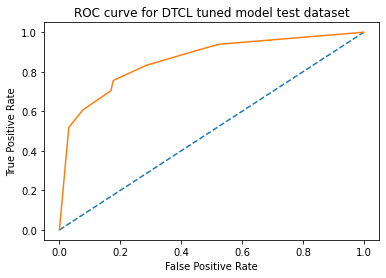

In [242]:
probs = grid_search_dtcl.predict_proba(X_test) 
probs = probs[:, 1]
dtcl_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for DTCL tuned model test dataset is : %.3f' % dtcl_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for DTCL tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

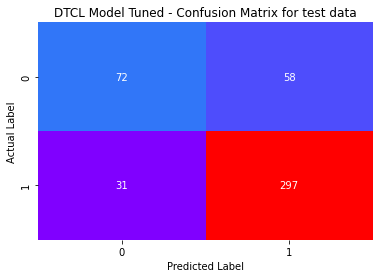

In [243]:
confusion_matrix(y_test,y_test_predict_dtcl)
sns.heatmap(confusion_matrix(y_test,y_test_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('DTCL Model Tuned - Confusion Matrix for test data')
plt.show()

### Random Forest 

### Train Data

In [244]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [245]:
y_train_predict_rf = rf_model.predict(X_train)

In [246]:
rf_model_score_train = rf_model.score(X_train, y_train)
print('The train score of Random Forest model is: ',rf_model_score_train)

The train score of Random Forest model is:  0.9990627928772259


In [247]:
confusion_matrix(y_train, y_train_predict_rf)

array([[331,   1],
       [  0, 735]], dtype=int64)

In [248]:
print(classification_report(y_train, y_train_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [249]:
rf_metrics=classification_report(y_train,y_train_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(ds.loc["1"][0],2)
rf_train_recall=round(ds.loc["1"][1],2)
rf_train_f1=round(ds.loc["1"][2],2)
print('rf_train_precision ',rf_train_precision)
print('rf_train_recall ',rf_train_recall)
print('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


ROC_AUC score for RF model train dataset is : 1.000


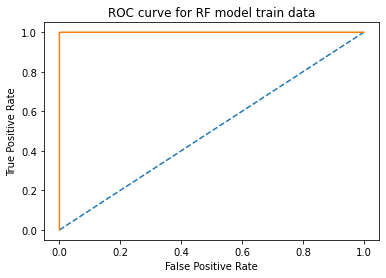

In [250]:
probs = rf_model.predict_proba(X_train) 
probs = probs[:, 1]
rf_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for RF model train dataset is : %.3f' % rf_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for RF model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

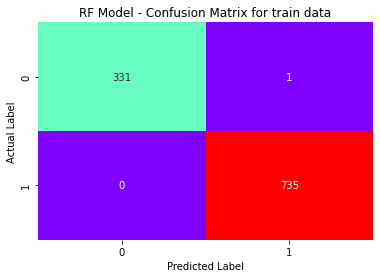

In [251]:
confusion_matrix(y_train,y_train_predict_rf)
sns.heatmap(confusion_matrix(y_train,y_train_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [252]:
y_test_predict_rf = rf_model.predict(X_test)

In [253]:
rf_model_score_test = rf_model.score(X_test, y_test)
print('The test score of Random Forest model is: ',rf_model_score_test)

The test score of Random Forest model is:  0.8187772925764192


In [254]:
confusion_matrix(y_test, y_test_predict_rf)

array([[ 91,  39],
       [ 44, 284]], dtype=int64)

In [255]:
print(classification_report(y_test, y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [256]:
rf_metrics=classification_report(y_test,y_test_predict_rf,output_dict=True) 
ds=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(ds.loc["1"][0],2)
rf_test_recall=round(ds.loc["1"][1],2)
rf_test_f1=round(ds.loc["1"][2],2)
print('rf_test_precision ',rf_test_precision)
print('rf_test_recall ',rf_test_recall)
print('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.88
rf_test_recall  0.87
rf_test_f1  0.87


ROC_AUC score for RF model test dataset is : 0.887


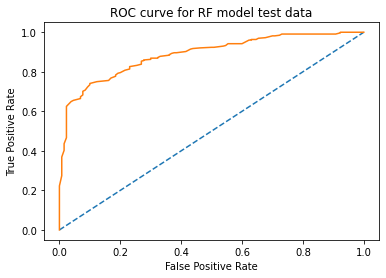

In [257]:
probs = rf_model.predict_proba(X_test) 
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for RF model test dataset is : %.3f' % rf_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for RF model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

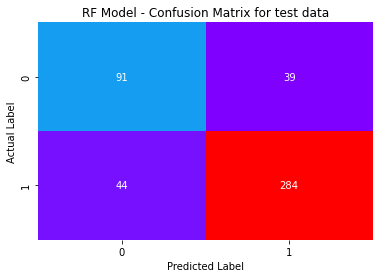

In [258]:
confusion_matrix(y_test,y_test_predict_rf)
sns.heatmap(confusion_matrix(y_test,y_test_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for Random Tree Classifier

In [259]:
grid = {'n_estimators':[50,100],
        'oob_score':[True,False],
        'max_samples':[1,3],
       'max_features':[1,3],
       'bootstrap':[True,False]}

In [260]:
rf_best_model=RandomForestClassifier()
rf_best_model.fit(X_train,y_train)

RandomForestClassifier()

In [261]:
grid_search = GridSearchCV(estimator=rf_best_model,param_grid=grid,cv=3,n_jobs=-1,scoring='f1')

In [262]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [1, 3],
                         'max_samples': [1, 3], 'n_estimators': [50, 100],
                         'oob_score': [True, False]},
             scoring='f1')

In [263]:
y_train_predict_rf_best = rf_best_model.predict(X_train)
y_test_predict_rf_best = rf_best_model.predict(X_test)

### Tuned RF Model for Train Data

In [264]:
y_train_predict_rf_best_prob=rf_best_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_rf_best_prob).head()

,0,1
0,0.24,0.76
1,0.77,0.23
2,0.07,0.93
3,0.09,0.91
4,0.69,0.31


In [265]:
print("The Best RF Model Score on train data set post tuning is %.3f " % rf_best_model.score(X_train,y_train))

The Best RF Model Score on train data set post tuning is 0.998 


In [266]:
confusion_matrix(y_train,y_train_predict_rf_best)

array([[330,   2],
       [  0, 735]], dtype=int64)

In [267]:
print(classification_report(y_train,y_train_predict_rf_best))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



ROC_AUC score for RF tuned model train dataset is : 1.000


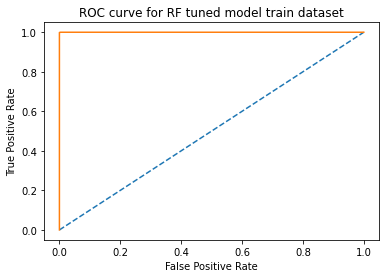

In [268]:
probs = rf_best_model.predict_proba(X_train) 
probs = probs[:, 1]
rf_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for RF tuned model train dataset is : %.3f' % rf_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for RF tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

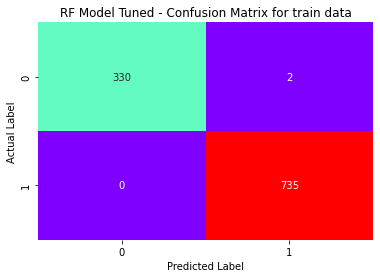

In [269]:
confusion_matrix(y_train,y_train_predict_rf_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_rf_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned RF Model for Test Data

In [270]:
y_test_predict_rf_best_prob=rf_best_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_rf_best_prob).head()

,0,1
0,0.57,0.43
1,0.86,0.14
2,0.18,0.82
3,0.30,0.70
4,0.16,0.84


In [271]:
print("The Best RF Model Score on test data set post tuning is %.3f " % rf_best_model.score(X_test,y_test))

The Best RF Model Score on test data set post tuning is 0.817 


In [272]:
confusion_matrix(y_test,y_test_predict_rf_best)

array([[ 87,  43],
       [ 41, 287]], dtype=int64)

In [273]:
print(classification_report(y_test,y_test_predict_rf_best))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



ROC_AUC score for RF tuned model test dataset is : 0.885


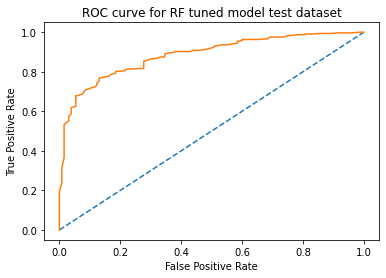

In [274]:
probs = rf_best_model.predict_proba(X_test) 
probs = probs[:, 1]
rf_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for RF tuned model test dataset is : %.3f' % rf_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for RF tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

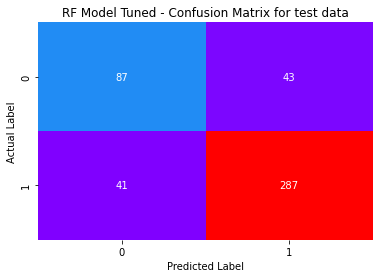

In [275]:
confusion_matrix(y_test,y_test_predict_rf_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_rf_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('RF Model Tuned - Confusion Matrix for test data')
plt.show()

### Bagging Model

In [276]:
cart = DecisionTreeClassifier()

In [277]:
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

### Train data

In [278]:
y_train_predict_bag = bagging_model.predict(X_train)

In [279]:
bag_model_score_train = bagging_model.score(X_train, y_train)
print('The train score of Bagging model is: ',bag_model_score_train)

The train score of Bagging model is:  0.9990627928772259


In [280]:
y_train_predict_bag_prob=bagging_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_bag_prob).head()

,0,1
0,0.250,0.750
1,0.690,0.310
2,0.220,0.780
3,0.085,0.915
4,0.610,0.390


In [281]:
y_train_predict_bag=bagging_model.predict(X_train)

In [282]:
confusion_matrix(y_train, y_train_predict_bag)

array([[331,   1],
       [  0, 735]], dtype=int64)

In [283]:
print(classification_report(y_train, y_train_predict_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [284]:
bag_metrics=classification_report(y_train,y_train_predict_bag,output_dict=True) 
ds=pd.DataFrame(bag_metrics).transpose()
bag_train_precision=round(ds.loc["1"][0],2)
bag_train_recall=round(ds.loc["1"][1],2)
bag_train_f1=round(ds.loc["1"][2],2)
print('bag_train_precision ',bag_train_precision)
print('bag_train_recall ',bag_train_recall)
print('bag_train_f1 ',bag_train_f1)

bag_train_precision  1.0
bag_train_recall  1.0
bag_train_f1  1.0


ROC_AUC score for bagging model train dataset is : 1.000


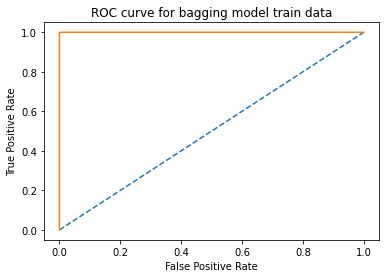

In [285]:
probs = bagging_model.predict_proba(X_train) 
probs = probs[:, 1]
bag_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for bagging model train dataset is : %.3f' % bag_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for bagging model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

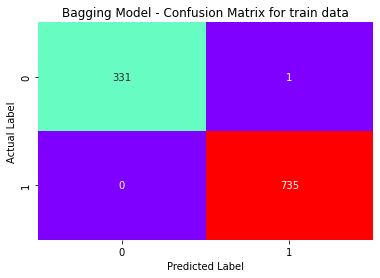

In [286]:
confusion_matrix(y_train,y_train_predict_bag)
sns.heatmap(confusion_matrix(y_train,y_train_predict_bag),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [287]:
y_test_predict_bag = bagging_model.predict(X_test)

In [288]:
bag_model_score_test = bagging_model.score(X_test, y_test)
print('The test score of Bagging model is: ',bag_model_score_test)

The test score of Bagging model is:  0.7969432314410481


In [289]:
y_test_predict_bag_prob=bagging_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_bag_prob).head()

,0,1
0,0.63,0.37
1,0.93,0.07
2,0.32,0.68
3,0.19,0.81
4,0.09,0.91


In [290]:
y_test_predict_bag=bagging_model.predict(X_test)

In [291]:
confusion_matrix(y_test, y_test_predict_bag)

array([[ 84,  46],
       [ 47, 281]], dtype=int64)

In [292]:
print(classification_report(y_test, y_test_predict_bag))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



In [293]:
bag_metrics=classification_report(y_test,y_test_predict_bag,output_dict=True) 
ds=pd.DataFrame(bag_metrics).transpose()
bag_test_precision=round(ds.loc["1"][0],2)
bag_test_recall=round(ds.loc["1"][1],2)
bag_test_f1=round(ds.loc["1"][2],2)
print('bag_test_precision ',bag_test_precision)
print('bag_test_recall ',bag_test_recall)
print('bag_test_f1 ',bag_test_f1)

bag_test_precision  0.86
bag_test_recall  0.86
bag_test_f1  0.86


ROC_AUC score for bagging model test dataset is : 0.878


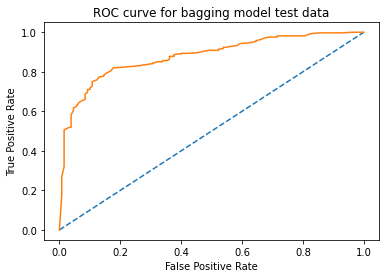

In [294]:
probs = bagging_model.predict_proba(X_test) 
probs = probs[:, 1]
bag_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for bagging model test dataset is : %.3f' % bag_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for bagging model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

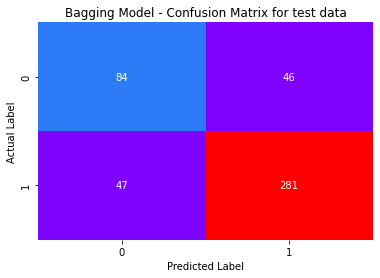

In [295]:
confusion_matrix(y_test,y_test_predict_bag)
sns.heatmap(confusion_matrix(y_test,y_test_predict_bag),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for Bagging Model

In [296]:
grid = {'n_estimators':[50,100],
        'oob_score':[True,False],
        'max_samples':[1,3],
       'max_features':[1,3],
       'bootstrap':[True,False]}

In [297]:
bag_best_model=BaggingClassifier(RandomForestClassifier())
bag_best_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [298]:
grid_search = GridSearchCV(estimator=bag_best_model,param_grid=grid,cv=3,n_jobs=-1,scoring='f1')

In [299]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [1, 3],
                         'max_samples': [1, 3], 'n_estimators': [50, 100],
                         'oob_score': [True, False]},
             scoring='f1')

In [300]:
y_train_predict_bag_best = bag_best_model.predict(X_train)
y_test_predict_bag_best = bag_best_model.predict(X_test)

### Tuned Bagging Model for Train Data

In [301]:
y_train_predict_bag_best_prob=bag_best_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_bag_best_prob).head()

,0,1
0,0.494000,0.506000
1,0.637000,0.363000
2,0.161000,0.839000
3,0.146333,0.853667
4,0.584000,0.416000


In [302]:
print("The Best Bagging Model Score on train data set post tuning is %.3f " % bag_best_model.score(X_train,y_train))

The Best Bagging Model Score on train data set post tuning is 0.964 


In [303]:
confusion_matrix(y_train,y_train_predict_bag_best)

array([[303,  29],
       [  9, 726]], dtype=int64)

In [304]:
print(classification_report(y_train,y_train_predict_bag_best))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       332
           1       0.96      0.99      0.97       735

    accuracy                           0.96      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.96      0.96      0.96      1067



ROC_AUC score for Bagging tuned model train dataset is : 0.996


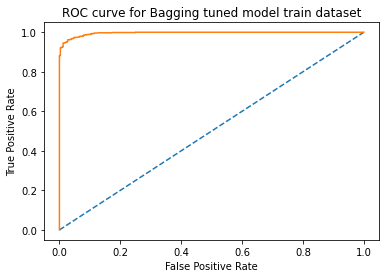

In [305]:
probs = bag_best_model.predict_proba(X_train) 
probs = probs[:, 1]
bag_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for Bagging tuned model train dataset is : %.3f' % bag_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Bagging tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

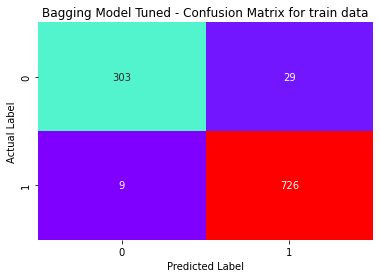

In [306]:
confusion_matrix(y_train,y_train_predict_bag_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_bag_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned Bagging Model for Test Data

In [307]:
y_test_predict_bag_best_prob=bag_best_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_bag_best_prob).head()

,0,1
0,0.630,0.370
1,0.817,0.183
2,0.327,0.673
3,0.384,0.616
4,0.251,0.749


In [308]:
print("The Best Bagging Model Score on test data set post tuning is %.3f " % bag_best_model.score(X_test,y_test))

The Best Bagging Model Score on test data set post tuning is 0.830 


In [309]:
confusion_matrix(y_test,y_test_predict_bag_best)

array([[ 89,  41],
       [ 37, 291]], dtype=int64)

In [310]:
print(classification_report(y_test,y_test_predict_bag_best))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       130
           1       0.88      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



ROC_AUC score for Bagging tuned model test dataset is : 0.895


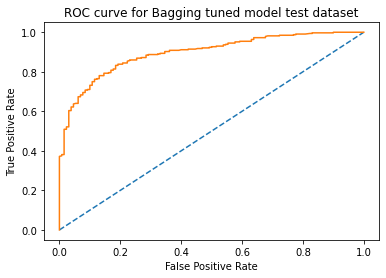

In [311]:
probs = bag_best_model.predict_proba(X_test) 
probs = probs[:, 1]
bag_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for Bagging tuned model test dataset is : %.3f' % bag_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Bagging tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

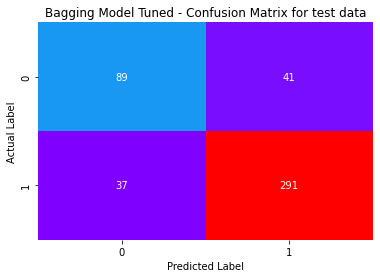

In [312]:
confusion_matrix(y_test,y_test_predict_bag_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_bag_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging Model Tuned - Confusion Matrix for test data')
plt.show()

### Boosting Method

### Train Data

In [313]:
boost_model = AdaBoostClassifier(n_estimators=100,random_state=1)
boost_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [314]:
y_train_predict_boost = boost_model.predict(X_train)

In [315]:
boost_model_score_train = boost_model.score(X_train, y_train)
print('The train score of Boosting model is: ',boost_model_score_train)

The train score of Boosting model is:  0.8472352389878163


In [316]:
y_train_predict_boost_prob=boost_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_boost_prob).head()

,0,1
0,0.502616,0.497384
1,0.497760,0.502240
2,0.497484,0.502516
3,0.496238,0.503762
4,0.499952,0.500048


In [317]:
y_train_predict_boost=boost_model.predict(X_train)

In [318]:
confusion_matrix(y_train, y_train_predict_boost)

array([[238,  94],
       [ 69, 666]], dtype=int64)

In [319]:
print(classification_report(y_train, y_train_predict_boost))

              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [320]:
boost_metrics=classification_report(y_train,y_train_predict_boost,output_dict=True) 
ds=pd.DataFrame(boost_metrics).transpose()
boost_train_precision=round(ds.loc["1"][0],2)
boost_train_recall=round(ds.loc["1"][1],2)
boost_train_f1=round(ds.loc["1"][2],2)
print('boost_train_precision ',boost_train_precision)
print('boost_train_recall ',boost_train_recall)
print('boost_train_f1 ',boost_train_f1)

boost_train_precision  0.88
boost_train_recall  0.91
boost_train_f1  0.89


ROC_AUC score for boosting model train dataset is : 0.913


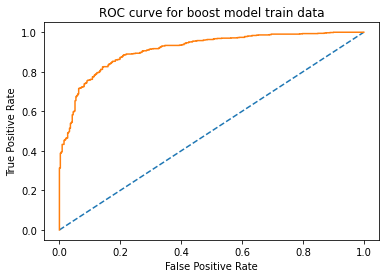

In [321]:
probs = boost_model.predict_proba(X_train) 
probs = probs[:, 1]
boost_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for boosting model train dataset is : %.3f' % boost_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for boost model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

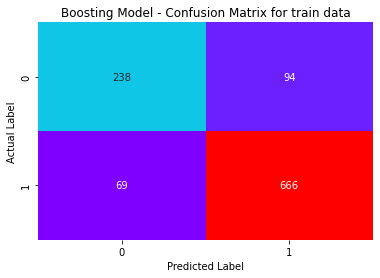

In [322]:
confusion_matrix(y_train,y_train_predict_boost)
sns.heatmap(confusion_matrix(y_train,y_train_predict_boost),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Boosting Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [323]:
y_test_predict_boost = boost_model.predict(X_test)

In [324]:
boost_model_score_test = boost_model.score(X_test, y_test)
print('The test score of Boosting model is: ',boost_model_score_test)

The test score of Boosting model is:  0.8187772925764192


In [325]:
y_test_predict_boost_prob=boost_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_boost_prob).head()

,0,1
0,0.504648,0.495352
1,0.502908,0.497092
2,0.499251,0.500749
3,0.500577,0.499423
4,0.495703,0.504297


In [326]:
y_test_predict_boost=boost_model.predict(X_test)

In [327]:
confusion_matrix(y_test, y_test_predict_boost)

array([[ 90,  40],
       [ 43, 285]], dtype=int64)

In [328]:
print(classification_report(y_test, y_test_predict_boost))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [329]:
boost_metrics=classification_report(y_test,y_test_predict_boost,output_dict=True) 
ds=pd.DataFrame(boost_metrics).transpose()
boost_test_precision=round(ds.loc["1"][0],2)
boost_test_recall=round(ds.loc["1"][1],2)
boost_test_f1=round(ds.loc["1"][2],2)
print('boost_test_precision ',boost_test_precision)
print('boost_test_recall ',boost_test_recall)
print('boost_test_f1 ',boost_test_f1)

boost_test_precision  0.88
boost_test_recall  0.87
boost_test_f1  0.87


ROC_AUC score for boosting model test dataset is : 0.879


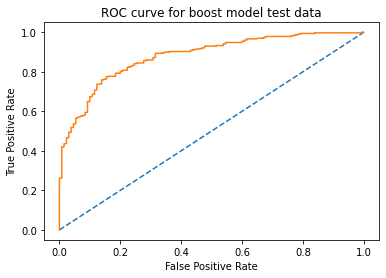

In [330]:
probs = boost_model.predict_proba(X_test) 
probs = probs[:, 1]
boost_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for boosting model test dataset is : %.3f' % boost_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for boost model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

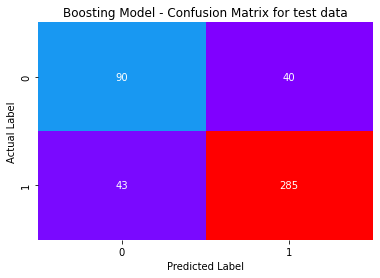

In [331]:
confusion_matrix(y_test,y_test_predict_boost)
sns.heatmap(confusion_matrix(y_test,y_test_predict_boost),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Boosting Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchCV for Boosting Method

In [332]:
grid={'n_estimators':[500,1000,2000],
     'learning_rate':[0.001,0.01,0.1]}

In [333]:
boost_best_model=AdaBoostClassifier()
boost_best_model.fit(X_train,y_train)

AdaBoostClassifier()

In [334]:
grid_search=GridSearchCV(estimator=boost_best_model,param_grid=grid,cv=3,n_jobs=1)

In [335]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]})

In [336]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'learning_rate': 0.01, 'n_estimators': 1000} 

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)


In [337]:
y_train_predict_best_boost = boost_best_model.predict(X_train)
y_test_predict_best_boost = boost_best_model.predict(X_test)

### Tuned Boosting Model for Train Data

In [338]:
y_train_predict_boost_best_prob=boost_best_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_boost_best_prob).head()

,0,1
0,0.504851,0.495149
1,0.494660,0.505340
2,0.495218,0.504782
3,0.494269,0.505731
4,0.499789,0.500211


In [339]:
print("The Best Boost Model Score on train data set post tuning is %.3f " % boost_best_model.score(X_train,y_train))

The Best Boost Model Score on train data set post tuning is 0.843 


In [340]:
confusion_matrix(y_train,y_train_predict_best_boost)

array([[236,  96],
       [ 72, 663]], dtype=int64)

In [341]:
print(classification_report(y_train,y_train_predict_best_boost))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



ROC_AUC score for Boost tuned model train dataset is : 0.910


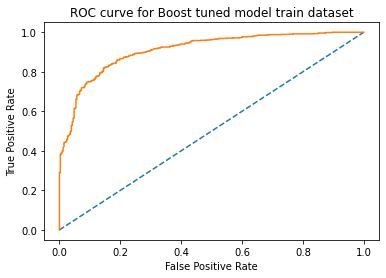

In [342]:
probs = boost_best_model.predict_proba(X_train) 
probs = probs[:, 1]
boost_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for Boost tuned model train dataset is : %.3f' % boost_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Boost tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

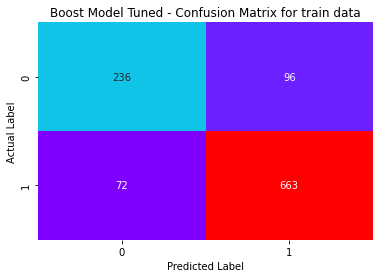

In [343]:
confusion_matrix(y_train,y_train_predict_best_boost)
sns.heatmap(confusion_matrix(y_train,y_train_predict_best_boost),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Boost Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned Boost Model for Test Data

In [344]:
y_test_predict_boost_best_prob=boost_best_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_boost_best_prob).head()

,0,1
0,0.508910,0.491090
1,0.506107,0.493893
2,0.498117,0.501883
3,0.502440,0.497560
4,0.492616,0.507384


In [345]:
print("The Best Boost Model Score on test data set post tuning is %.3f " % boost_best_model.score(X_test,y_test))

The Best Boost Model Score on test data set post tuning is 0.823 


In [346]:
confusion_matrix(y_test,y_test_predict_best_boost)

array([[ 90,  40],
       [ 41, 287]], dtype=int64)

In [347]:
print(classification_report(y_test,y_test_predict_best_boost))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



ROC_AUC score for Boost tuned model test dataset is : 0.880


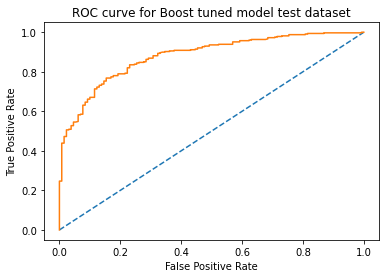

In [348]:
probs = boost_best_model.predict_proba(X_test) 
probs = probs[:, 1]
boost_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for Boost tuned model test dataset is : %.3f' % boost_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Boost tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

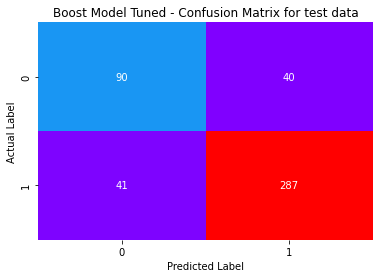

In [349]:
confusion_matrix(y_test,y_test_predict_best_boost)
sns.heatmap(confusion_matrix(y_test,y_test_predict_best_boost),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Boost Model Tuned - Confusion Matrix for test data')
plt.show()

### Gradient Boosting Classifier Model

### Train Data

In [350]:
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [351]:
y_train_predict_gbcl = gbcl_model.predict(X_train)

In [352]:
gbcl_model_score_train = gbcl_model.score(X_train, y_train)
print('The train score of Gradient Boosting Classifier model is: ',gbcl_model_score_train)

The train score of Gradient Boosting Classifier model is:  0.8865979381443299


In [353]:
y_train_predict_gbcl_prob=gbcl_model.predict_proba(X_train)
pd.DataFrame(y_train_predict_gbcl_prob).head()

,0,1
0,0.715613,0.284387
1,0.365785,0.634215
2,0.134966,0.865034
3,0.185846,0.814154
4,0.845788,0.154212


In [354]:
y_train_predict_gbcl=gbcl_model.predict(X_train)

In [355]:
confusion_matrix(y_train, y_train_predict_gbcl)

array([[262,  70],
       [ 51, 684]], dtype=int64)

In [356]:
print(classification_report(y_train, y_train_predict_gbcl))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [357]:
gbcl_metrics=classification_report(y_train,y_train_predict_gbcl,output_dict=True) 
ds=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_precision=round(ds.loc["1"][0],2)
gbcl_train_recall=round(ds.loc["1"][1],2)
gbcl_train_f1=round(ds.loc["1"][2],2)
print('gbcl_train_precision ',gbcl_train_precision)
print('gbcl_train_recall ',gbcl_train_recall)
print('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  0.91
gbcl_train_recall  0.93
gbcl_train_f1  0.92


ROC_AUC score for GBCL model train dataset is : 0.950


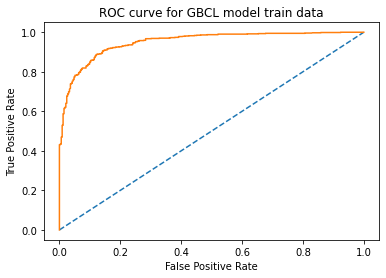

In [358]:
probs = gbcl_model.predict_proba(X_train) 
probs = probs[:, 1]
gbcl_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for GBCL model train dataset is : %.3f' % gbcl_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GBCL model train data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

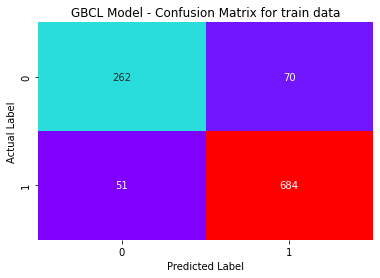

In [359]:
confusion_matrix(y_train,y_train_predict_gbcl)
sns.heatmap(confusion_matrix(y_train,y_train_predict_gbcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('GBCL Model - Confusion Matrix for train data')
plt.show()

### Test Data

In [360]:
y_test_predict_gbcl = gbcl_model.predict(X_test)

In [361]:
gbcl_model_score_test = gbcl_model.score(X_test, y_test)
print('The test score of Gradient Boosting Classifier model is: ',gbcl_model_score_test)

The test score of Gradient Boosting Classifier model is:  0.8318777292576419


In [362]:
y_test_predict_gbcl_prob=gbcl_model.predict_proba(X_test)
pd.DataFrame(y_test_predict_gbcl_prob).head()

,0,1
0,0.876960,0.123040
1,0.839873,0.160127
2,0.172940,0.827060
3,0.368495,0.631505
4,0.234186,0.765814


In [363]:
y_test_predict_gbcl=gbcl_model.predict(X_test)

In [364]:
confusion_matrix(y_test, y_test_predict_gbcl)

array([[ 96,  34],
       [ 43, 285]], dtype=int64)

In [365]:
print(classification_report(y_test, y_test_predict_gbcl))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



In [366]:
gbcl_metrics=classification_report(y_test,y_test_predict_gbcl,output_dict=True) 
ds=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(ds.loc["1"][0],2)
gbcl_test_recall=round(ds.loc["1"][1],2)
gbcl_test_f1=round(ds.loc["1"][2],2)
print('gbcl_test_precision ',gbcl_test_precision)
print('gbcl_test_recall ',gbcl_test_recall)
print('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.89
gbcl_test_recall  0.87
gbcl_test_f1  0.88


ROC_AUC score for GBCL model test dataset is : 0.904


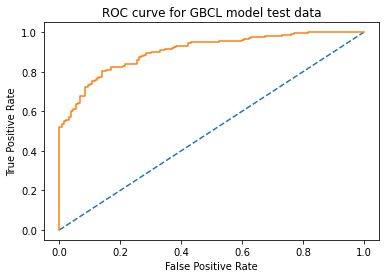

In [367]:
probs = gbcl_model.predict_proba(X_test) 
probs = probs[:, 1]
gbcl_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for GBCL model test dataset is : %.3f' % gbcl_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GBCL model test data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

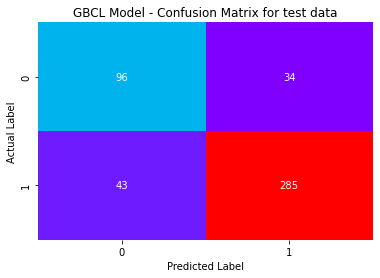

In [368]:
confusion_matrix(y_test,y_test_predict_gbcl)
sns.heatmap(confusion_matrix(y_test,y_test_predict_gbcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('GBCL Model - Confusion Matrix for test data')
plt.show()

### Applying GridSearchcv for Gradient Boosting Classifier Model

In [369]:
grid={'n_estimators':range(1000,2000,3000)}

In [370]:
gbcl_model_best=GradientBoostingClassifier()
gbcl_model_best.fit(X_train,y_train)

GradientBoostingClassifier()

In [371]:
grid_search = GridSearchCV(estimator = gbcl_model_best,param_grid = grid,cv=3)

In [372]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': range(1000, 2000, 3000)})

In [373]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_estimators': 1000} 

GradientBoostingClassifier(n_estimators=1000)


In [374]:
y_train_predict_gbcl_best = gbcl_model_best.predict(X_train)
y_test_predict_gbcl_best = gbcl_model_best.predict(X_test)

### Tuned Gradient Boost Classifier Model for Train Data

In [375]:
y_train_predict_gbcl_best_prob=gbcl_model_best.predict_proba(X_train)
pd.DataFrame(y_train_predict_gbcl_best_prob).head()

,0,1
0,0.715613,0.284387
1,0.365785,0.634215
2,0.134966,0.865034
3,0.185846,0.814154
4,0.845788,0.154212


In [376]:
print("The Best GBCL Model Score on train data set post tuning is %.3f " % gbcl_model_best.score(X_train,y_train))

The Best GBCL Model Score on train data set post tuning is 0.887 


In [377]:
confusion_matrix(y_train,y_train_predict_gbcl_best)

array([[262,  70],
       [ 51, 684]], dtype=int64)

In [378]:
print(classification_report(y_train,y_train_predict_gbcl_best))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



ROC_AUC score for GBCL tuned model train dataset is : 0.950


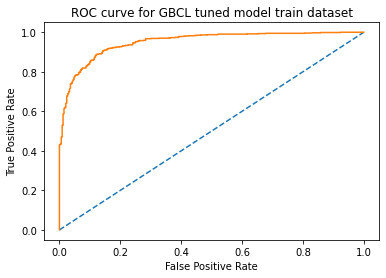

In [379]:
probs = gbcl_model_best.predict_proba(X_train) 
probs = probs[:, 1]
gbcl_tune_train_auc = roc_auc_score(y_train, probs)
print('ROC_AUC score for GBCL tuned model train dataset is : %.3f' % gbcl_tune_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GBCL tuned model train dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

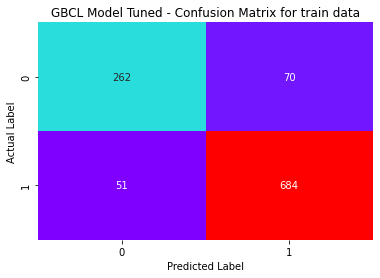

In [380]:
confusion_matrix(y_train,y_train_predict_gbcl_best)
sns.heatmap(confusion_matrix(y_train,y_train_predict_gbcl_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('GBCL Model Tuned - Confusion Matrix for train data')
plt.show()

### Tuned Gradient Boost Classifier Model for Test Data

In [381]:
y_test_predict_gbcl_best_prob=gbcl_model_best.predict_proba(X_test)
pd.DataFrame(y_test_predict_gbcl_best_prob).head()

,0,1
0,0.876960,0.123040
1,0.839873,0.160127
2,0.172940,0.827060
3,0.368495,0.631505
4,0.234186,0.765814


In [382]:
print("The Best GBCL Model Score on test data set post tuning is %.3f " % gbcl_model_best.score(X_test,y_test))

The Best GBCL Model Score on test data set post tuning is 0.832 


In [383]:
confusion_matrix(y_test,y_test_predict_gbcl_best)

array([[ 96,  34],
       [ 43, 285]], dtype=int64)

In [384]:
print(classification_report(y_test,y_test_predict_gbcl_best))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



ROC_AUC score for GBCL tuned model test dataset is : 0.904


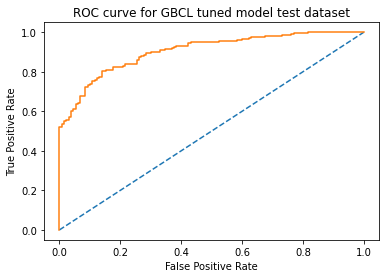

In [385]:
probs = gbcl_model_best.predict_proba(X_test) 
probs = probs[:, 1]
gbcl_tune_test_auc = roc_auc_score(y_test, probs)
print('ROC_AUC score for GBCL tuned model test dataset is : %.3f' % gbcl_tune_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for GBCL tuned model test dataset')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

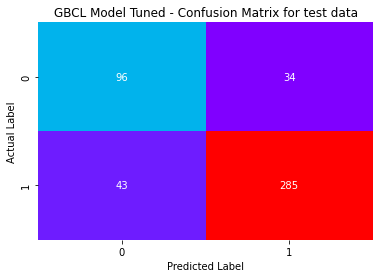

In [386]:
confusion_matrix(y_test,y_test_predict_gbcl_best)
sns.heatmap(confusion_matrix(y_test,y_test_predict_gbcl_best),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('GBCL Model Tuned - Confusion Matrix for test data')
plt.show()

In [387]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT_Train':[dt_model_score_train,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
'DT_Test':[dt_model_score_test,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
'RF_Train':[rf_model_score_train,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
'RF_Test':[rf_model_score_test,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
'Bag_Train':[bag_model_score_train,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
'Bag_Test':[bag_model_score_test,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
'Boost_Train':[boost_model_score_train,boost_train_auc,boost_train_recall,boost_train_precision,boost_train_f1],
'Boost_Test':[boost_model_score_test,boost_test_auc,boost_test_recall,boost_test_precision,boost_test_f1],
'GBCL_Train':[gbcl_model_score_train,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
'GBCL_Test':[gbcl_model_score_test,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1]},index=index)
round(data,2)

,DT_Train,DT_Test,RF_Train,RF_Test,Bag_Train,Bag_Test,Boost_Train,Boost_Test,GBCL_Train,GBCL_Test
Accuracy,1.0,1.0,1.0,0.82,1.0,0.80,0.85,0.82,0.89,0.83
AUC,1.0,1.0,1.0,0.89,1.0,0.88,0.91,0.88,0.95,0.90
Recall,1.0,1.0,1.0,0.87,1.0,0.86,0.91,0.87,0.93,0.87
Precision,1.0,1.0,1.0,0.88,1.0,0.86,0.88,0.88,0.91,0.89
F1 Score,1.0,1.0,1.0,0.87,1.0,0.86,0.89,0.87,0.92,0.88


# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [388]:
classifiers = [LogisticRegression(random_state=1234),LinearDiscriminantAnalysis(),GaussianNB(),KNeighborsClassifier(),
               DecisionTreeClassifier(),RandomForestClassifier(random_state=1234),BaggingClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers':cls.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

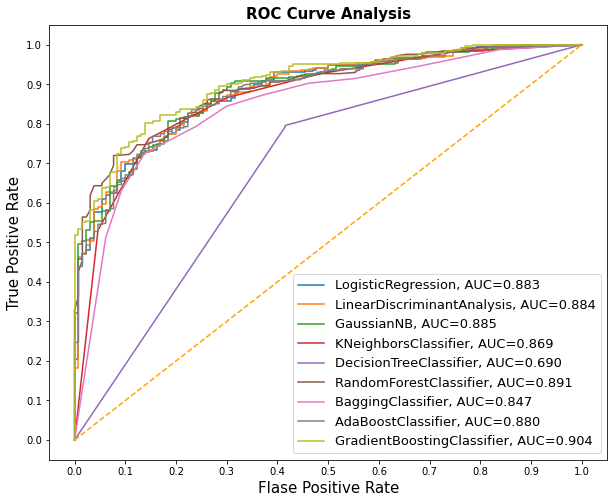

In [389]:
fig = plt.figure(figsize=(10,8))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [390]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR_Train':[log_train_acc,log_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'LR_Test':[log_test_acc,log_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
'LDA_Train':[ldc_train_acc,ldc_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
'LDA_Test':[ldc_test_acc,ldc_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
'KNN_Train':[knn_model_score_train,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
'KNN_Test':[knn_model_score_train,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
'NB_Train':[nb_model_score_train,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
'NB_Test':[nb_model_score_test,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
'DT_Train':[dt_model_score_train,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
'DT_Test':[dt_model_score_test,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
'RF_Train':[rf_model_score_train,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
'RF_Test':[rf_model_score_test,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
'Bag_Train':[bag_model_score_train,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
'Bag_Test':[bag_model_score_test,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
'Boost_Train':[boost_model_score_train,boost_train_auc,boost_train_recall,boost_train_precision,boost_train_f1],
'Boost_Test':[boost_model_score_test,boost_test_auc,boost_test_recall,boost_test_precision,boost_test_f1],
'GBCL_Train':[gbcl_model_score_train,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
'GBCL_Test':[gbcl_model_score_test,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1]},index=index)
round(data,2)

,LR_Train,LR_Test,LDA_Train,LDA_Test,KNN_Train,KNN_Test,NB_Train,NB_Test,DT_Train,DT_Test,RF_Train,RF_Test,Bag_Train,Bag_Test,Boost_Train,Boost_Test,GBCL_Train,GBCL_Test
Accuracy,0.84,0.82,0.84,0.82,0.86,0.86,0.83,0.82,1.0,1.0,1.0,0.82,1.0,0.80,0.85,0.82,0.89,0.83
AUC,0.89,0.88,0.89,0.88,0.93,0.87,0.89,0.88,1.0,1.0,1.0,0.89,1.0,0.88,0.91,0.88,0.95,0.90
Recall,0.91,0.89,0.90,0.88,0.92,0.87,0.88,0.86,1.0,1.0,1.0,0.87,1.0,0.86,0.91,0.87,0.93,0.87
Precision,0.87,0.87,0.87,0.87,0.89,0.88,0.88,0.89,1.0,1.0,1.0,0.88,1.0,0.86,0.88,0.88,0.91,0.89
F1 Score,0.89,0.88,0.89,0.87,0.90,0.87,0.88,0.87,1.0,1.0,1.0,0.87,1.0,0.86,0.89,0.87,0.92,0.88


In [391]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR_Train':[log_train_acc,log_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
'LDA_Train':[ldc_train_acc,ldc_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
'KNN_Train':[knn_model_score_train,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
'NB_Train':[nb_model_score_train,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
'DT_Train':[dt_model_score_train,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
'RF_Train':[rf_model_score_train,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
'Bag_Train':[bag_model_score_train,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
'Boost_Train':[boost_model_score_train,boost_train_auc,boost_train_recall,boost_train_precision,boost_train_f1],
'GBCL_Train':[gbcl_model_score_train,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1]},index=index)
round(data,2)

,LR_Train,LDA_Train,KNN_Train,NB_Train,DT_Train,RF_Train,Bag_Train,Boost_Train,GBCL_Train
Accuracy,0.84,0.84,0.86,0.83,1.0,1.0,1.0,0.85,0.89
AUC,0.89,0.89,0.93,0.89,1.0,1.0,1.0,0.91,0.95
Recall,0.91,0.90,0.92,0.88,1.0,1.0,1.0,0.91,0.93
Precision,0.87,0.87,0.89,0.88,1.0,1.0,1.0,0.88,0.91
F1 Score,0.89,0.89,0.90,0.88,1.0,1.0,1.0,0.89,0.92


In [392]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR_Test':[log_test_acc,log_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
'LDA_Test':[ldc_test_acc,ldc_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
'KNN_Test':[knn_model_score_train,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
'NB_Test':[nb_model_score_test,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
'DT_Test':[dt_model_score_test,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
'RF_Test':[rf_model_score_test,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
'Bag_Test':[bag_model_score_test,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
'Boost_Test':[boost_model_score_test,boost_test_auc,boost_test_recall,boost_test_precision,boost_test_f1],
'GBCL_Test':[gbcl_model_score_test,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1]},index=index)
round(data,2)

,LR_Test,LDA_Test,KNN_Test,NB_Test,DT_Test,RF_Test,Bag_Test,Boost_Test,GBCL_Test
Accuracy,0.82,0.82,0.86,0.82,1.0,0.82,0.80,0.82,0.83
AUC,0.88,0.88,0.87,0.88,1.0,0.89,0.88,0.88,0.90
Recall,0.89,0.88,0.87,0.86,1.0,0.87,0.86,0.87,0.87
Precision,0.87,0.87,0.88,0.89,1.0,0.88,0.86,0.88,0.89
F1 Score,0.88,0.87,0.87,0.87,1.0,0.87,0.86,0.87,0.88


# Problem 2 - Presidential Speech (Text Mining)

In [393]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.5
Matplotlib version: 3.4.3


In [394]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\dheepig\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [395]:
R_char = inaugural.raw('1941-Roosevelt.txt')
K_char = inaugural.raw('1961-Kennedy.txt')
N_char = inaugural.raw('1973-Nixon.txt')
print('Characters count for 1941-Roosevelt speech is =', len(R_char))
print('Characters count for 1961-Kennedy speech is =', len(K_char))
print('Characters count for 1973-Nixon speech is =', len(N_char))

Characters count for 1941-Roosevelt speech is = 7571
Characters count for 1961-Kennedy speech is = 7618
Characters count for 1973-Nixon speech is = 9991


In [396]:
R_words = inaugural.words('1941-Roosevelt.txt')
K_words = inaugural.words('1961-Kennedy.txt')
N_words = inaugural.words('1973-Nixon.txt')
print('Words count for 1941-Roosevelt speech is =', len(R_words))
print('Words count for 1961-Kennedy speech is =', len(K_words))
print('Words count for 1973-Nixon speech is =', len(N_words))

Words count for 1941-Roosevelt speech is = 1536
Words count for 1961-Kennedy speech is = 1546
Words count for 1973-Nixon speech is = 2028


In [397]:
R_sen = inaugural.sents('1941-Roosevelt.txt')
K_sen = inaugural.sents('1961-Kennedy.txt')
N_sen = inaugural.sents('1973-Nixon.txt')
print('Sentences count for 1941-Roosevelt speech is =', len(R_sen))
print('Sentences count for 1961-Kennedy speech is =', len(K_sen))
print('Sentences count for 1973-Nixon speech is =', len(N_sen))

Sentences count for 1941-Roosevelt speech is = 68
Sentences count for 1961-Kennedy speech is = 52
Sentences count for 1973-Nixon speech is = 69


# 2.2 Remove all the stopwords from all three speeches.

In [398]:
def remove_stopwords(array,stopw):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopw and a!='--':
            filtered.append(al)
    return filtered
stopwords_clean = set(stopwords.words('english')+list(string.punctuation))
Rwords = remove_stopwords(R_words,stopwords_clean)
Kwords = remove_stopwords(K_words,stopwords_clean)
Nwords = remove_stopwords(N_words,stopwords_clean)

print('Number of words in speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are',len(R_words))
print('Number of words in speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are',len(Rwords))
print('Number of words in speech of President John F. Kennedy in 1961-before removal of stopwords are',len(K_words))
print('Number of words in speech of President John F. Kennedy in 1961-after removal of stopwords are',len(Kwords))
print('Number of words in speech of President Richard Nixon in 1973-before removal of stopwords are',len(N_words))
print('Number of words in speech of President Richard Nixon in 1973-after removal of stopwords are',len(Nwords))

Number of words in speech of President Franklin D. Roosevelt in 1941-before removal of stopwords are 1536
Number of words in speech of President Franklin D. Roosevelt in 1941-after removal of stopwords are 632
Number of words in speech of President John F. Kennedy in 1961-before removal of stopwords are 1546
Number of words in speech of President John F. Kennedy in 1961-after removal of stopwords are 697
Number of words in speech of President Richard Nixon in 1973-before removal of stopwords are 2028
Number of words in speech of President Richard Nixon in 1973-after removal of stopwords are 836


In [399]:
# Show a sample sentence after the removal of stopwords.
example_sent = """On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States."""
stopwords_clean = set(stopwords.words('english')+list(string.punctuation))
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords_clean]
filtered_sentence = []
for w in word_tokens:
    if w not in stopwords_clean:
        filtered_sentence.append(w)
#Print Original sample sentence with stopwords.
print("Original example sentence",word_tokens)
#Print Filtered sentence after the removal of stopwords.
print("Filtered sentence",filtered_sentence)

Original example sentence ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.']
Filtered sentence ['On', 'national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States']


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [400]:
def top3words(array):
    Ctr = Counter(array)
    most_occur = Ctr.most_common(3)
    return most_occur
print('Top three words of Roosevelt:',top3words(Rwords))
print('Top three words of Kennedy:',top3words(Kwords))
print('Top three words of Nixon:',top3words(Nwords))

Top three words of Roosevelt: [('nation', 12), ('know', 10), ('spirit', 9)]
Top three words of Kennedy: [('let', 16), ('us', 12), ('world', 8)]
Top three words of Nixon: [('us', 26), ('let', 22), ('america', 21)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [401]:
def word_cloud(w):
    wordcloud = WordCloud(width = 800, height = 800,background_color ='black',min_font_size = 10).generate(w)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

Word Cloud for 1941-Roosevelt speech is


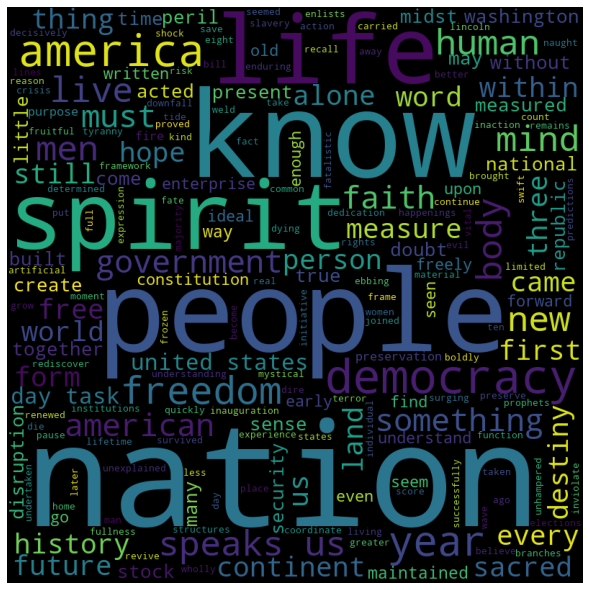

In [402]:
print('Word Cloud for 1941-Roosevelt speech is')
word_cloud((" ").join(Rwords))

Word Cloud for 1961-Kennedy speech is


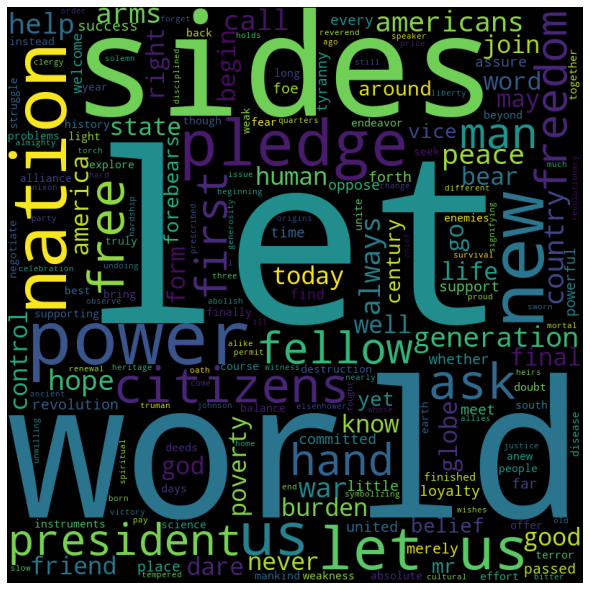

In [403]:
print('Word Cloud for 1961-Kennedy speech is')
word_cloud((" ").join(Kwords))

Word counts for 1973-Nixon speech is


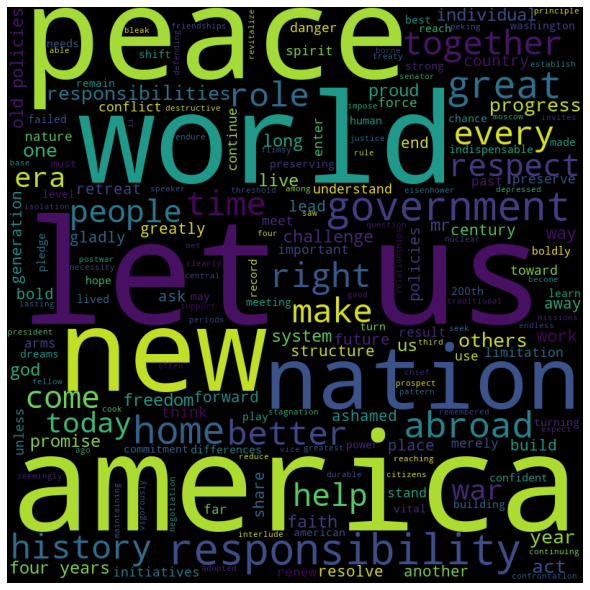

In [404]:
print('Word counts for 1973-Nixon speech is')
word_cloud((" ").join(Nwords))